# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, SelectKBest, chi2

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/FYP/Kidney_dataset.csv')

# Data Understanding

In [ ]:
df.shape

(52286, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52286 entries, 0 to 52285
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Serum Creatinine          51786 non-null  float64
 1   eGFR                      51786 non-null  float64
 2   BUN                       51786 non-null  float64
 3   UACR                      51786 non-null  float64
 4   Urine Output              51786 non-null  float64
 5   Sodium                    51786 non-null  float64
 6   Potassium                 51786 non-null  float64
 7   Hemoglobin                51786 non-null  float64
 8   Systolic Blood Pressure   51786 non-null  float64
 9   Diastolic Blood Pressure  51786 non-null  float64
dtypes: float64(10)
memory usage: 4.0 MB


In [ ]:
print(df.head().T)

                              0      1      2      3      4
Serum Creatinine            0.9    1.3    1.2    1.3    0.5
eGFR                       81.8   14.8   44.1   59.6   98.5
BUN                        15.7   15.3   11.4   16.1   12.6
UACR                       25.2  181.6  233.5  234.1  263.4
Urine Output                0.9    1.2    0.6    1.2    0.8
Sodium                    145.5  138.0  135.3  140.6  139.5
Potassium                   3.7    3.6    3.6    4.2    4.9
Hemoglobin                 11.6   11.5   11.8   12.8   12.5
Systolic Blood Pressure   169.1  119.0   86.8  176.8  128.8
Diastolic Blood Pressure   96.2   74.3   68.3   85.2  114.8


In [ ]:
df.sample()

Serum Creatinine  eGFR   BUN  UACR  Urine Output  Sodium  Potassium  \
5409               1.1  67.4  12.2  93.7           1.6   137.6        4.2   

      Hemoglobin  Systolic Blood Pressure  Diastolic Blood Pressure  
5409        14.4                     97.7                      73.9

# EDA

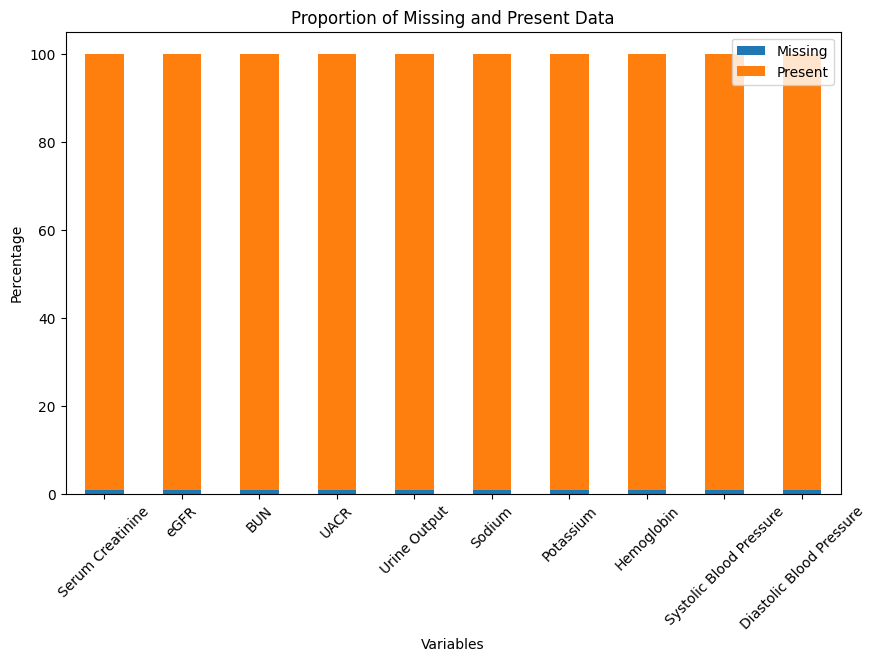

In [ ]:
# Calculate the proportions
missing_ratio = df.isnull().mean() * 100
present_ratio = 100 - missing_ratio

# Create a DataFrame for the plot
stack_data = pd.DataFrame({'Missing': missing_ratio, 'Present': present_ratio})

# Plot
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Missing and Present Data')
plt.xlabel('Variables')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


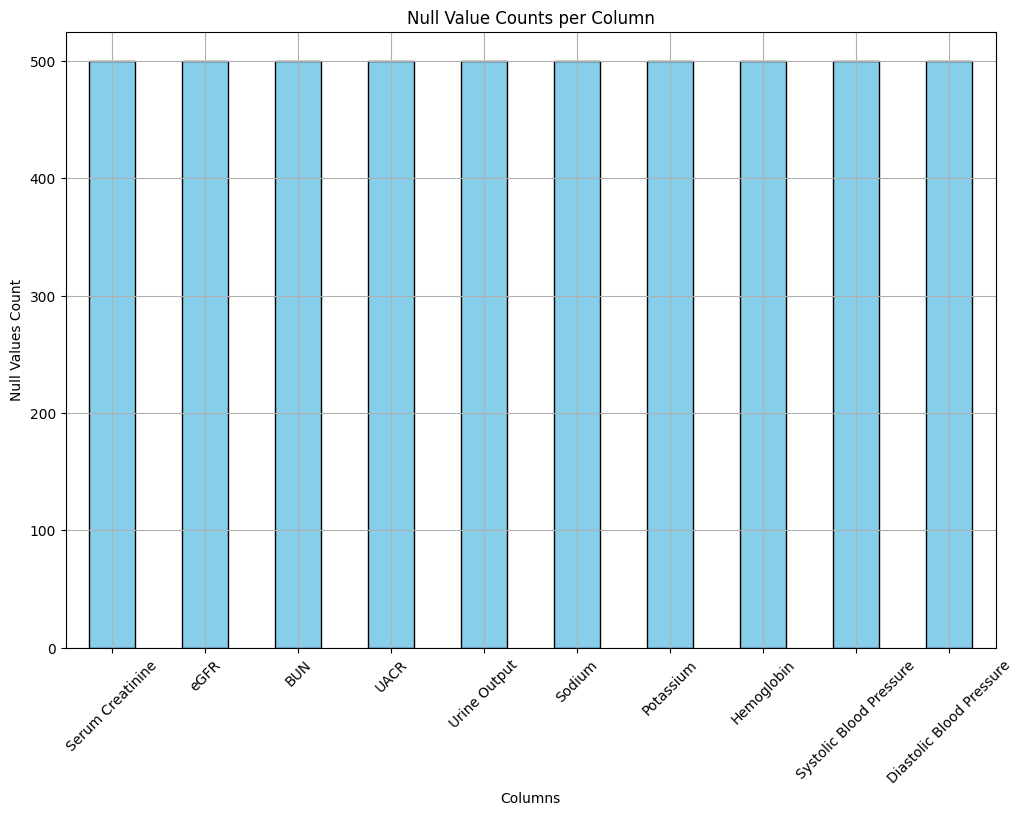

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
null_counts = df.isnull().sum()
# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size as needed
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Null Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


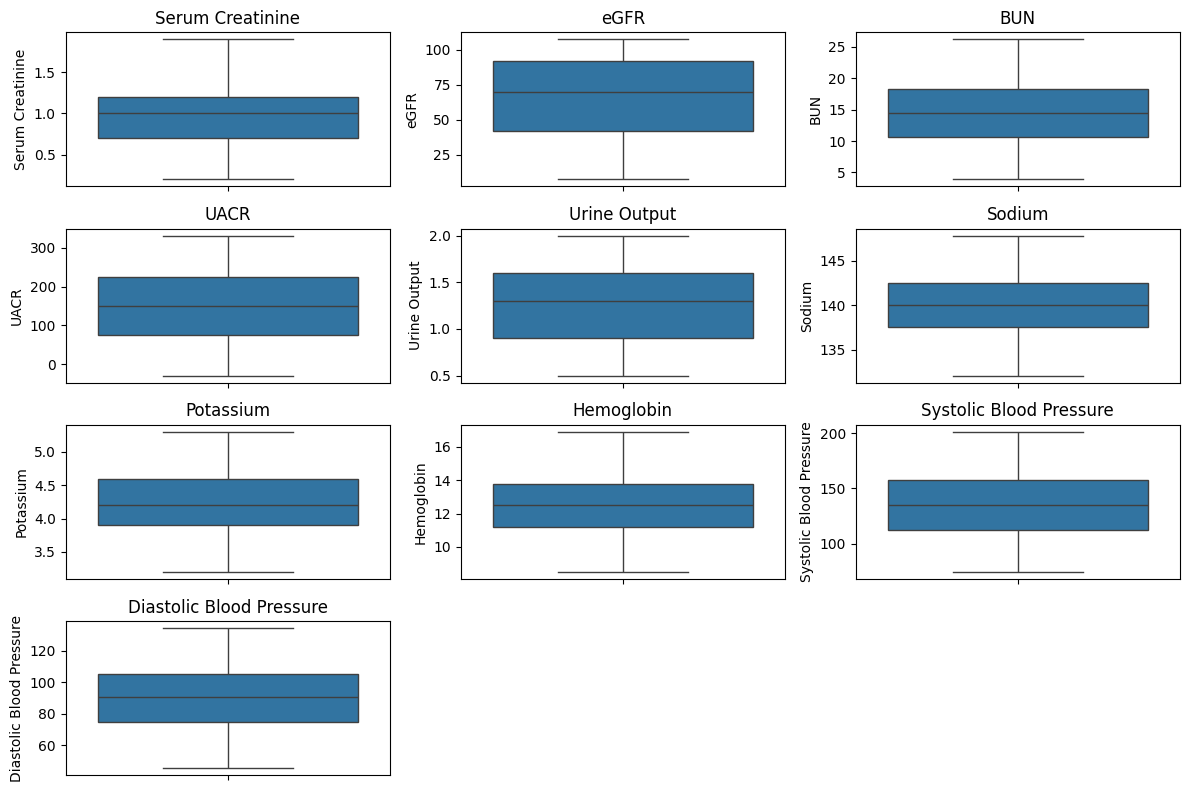

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot((len(df.columns) + 2) // 3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

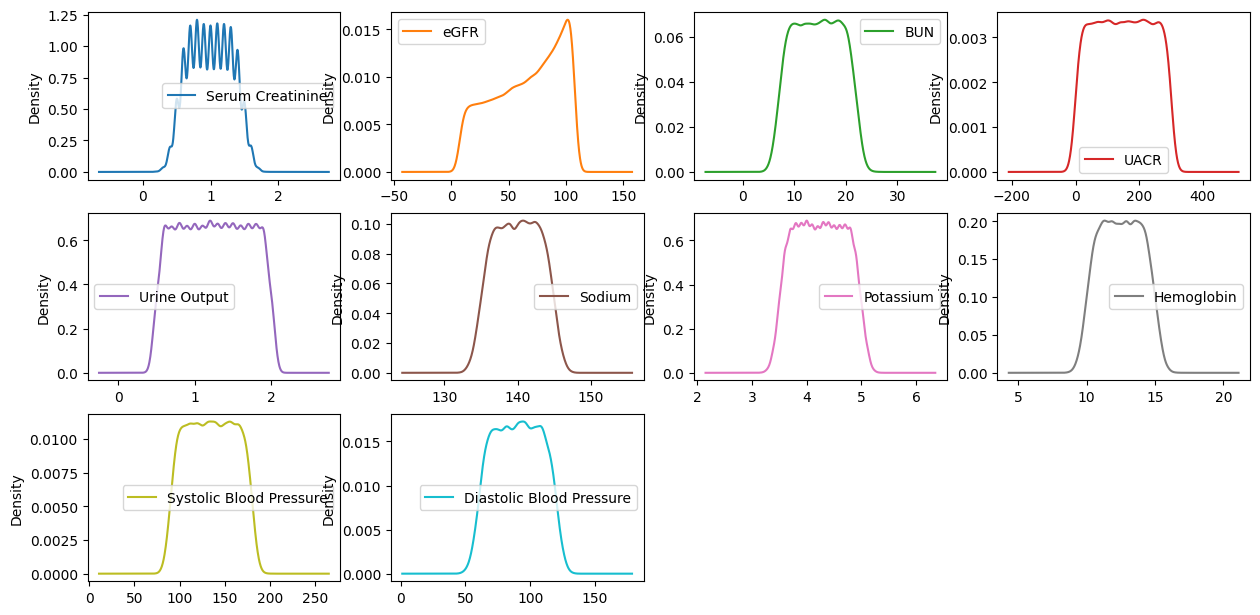

In [ ]:
# Density plot for each feature
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False,
        figsize=(15, 10))
plt.show()


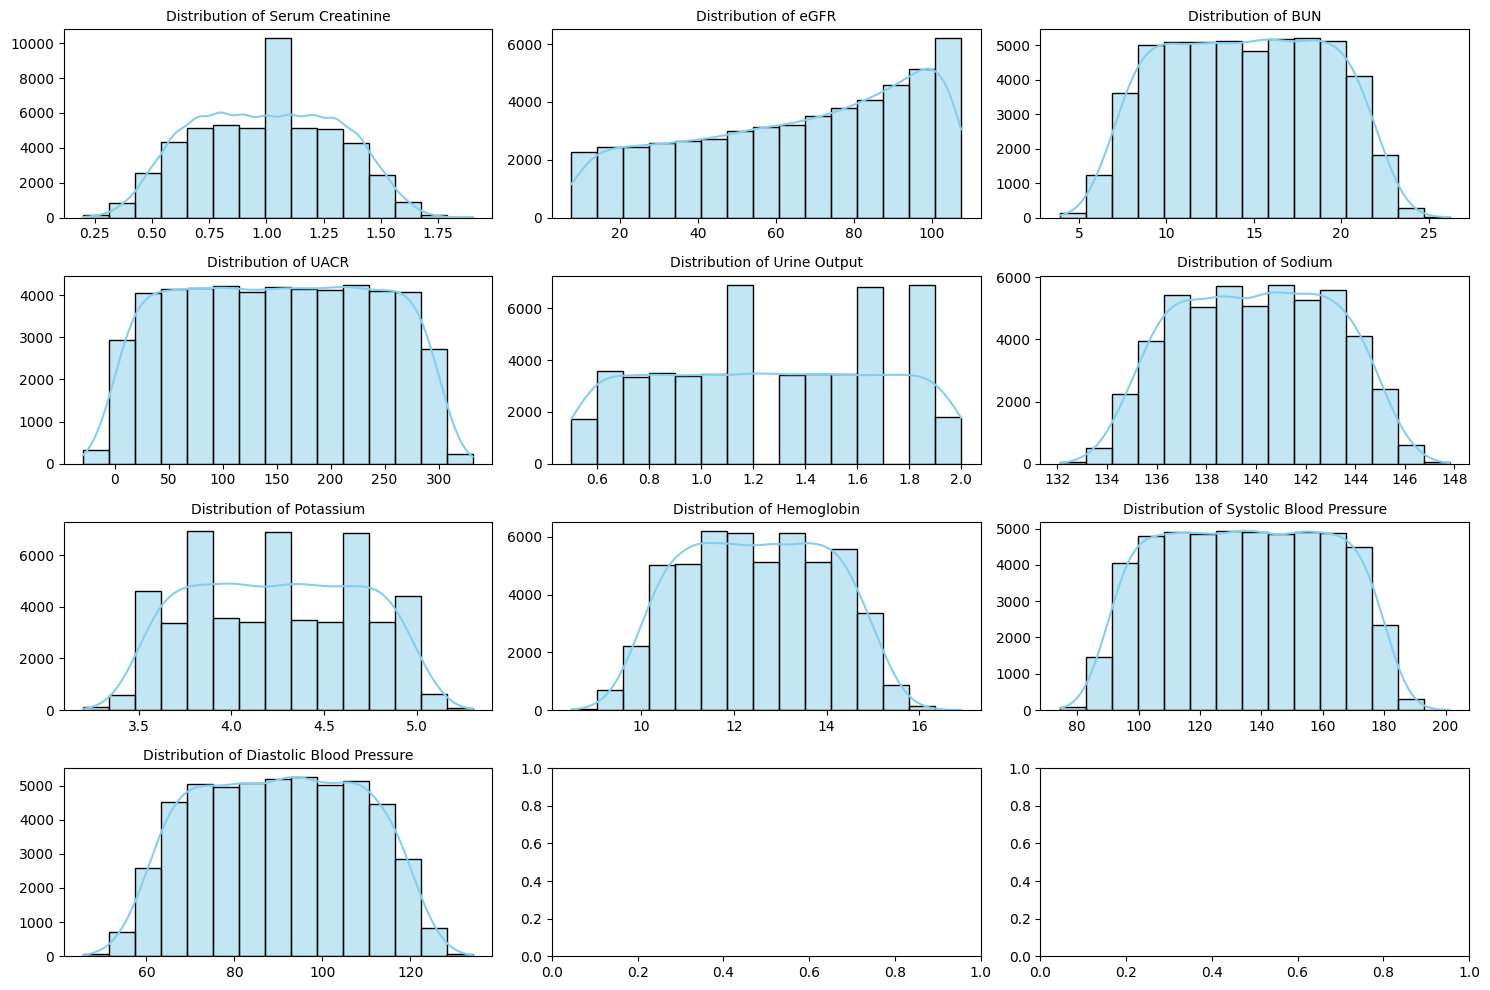

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
for idx, col in enumerate(df.columns ):
    ax = axes[idx//3, idx%3]
    sns.histplot(df[col], kde=True, ax=ax,color='skyblue',
                 edgecolor='black', bins=15,kde_kws={'bw_adjust': 1.5})
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.tight_layout()

# Duplicates Data

In [ ]:
print("Number of duplicate records:", df.duplicated().sum())

Number of duplicate records: 1888


In [ ]:
df= df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

# Null Value

In [ ]:
print(df.isnull().sum())

Serum Creatinine            500
eGFR                        500
BUN                         500
UACR                        500
Urine Output                500
Sodium                      500
Potassium                   500
Hemoglobin                  500
Systolic Blood Pressure     500
Diastolic Blood Pressure    500
dtype: int64


In [ ]:
skewness = df.skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 Serum Creatinine            0.009324
eGFR                       -0.346638
BUN                        -0.004308
UACR                       -0.001095
Urine Output               -0.001594
Sodium                     -0.014748
Potassium                   0.004786
Hemoglobin                  0.002622
Systolic Blood Pressure     0.000379
Diastolic Blood Pressure   -0.007797
dtype: float64


In [ ]:
# Function to count the number of decimal places
def count_decimal_places(x):
    try:
        parts = str(x).split('.')
        if len(parts) == 2:
            return len(parts[1])
        else:
            return 0
    except:
        return 0

# Determine the number of decimal places for each column
decimal_places = df.applymap(count_decimal_places)

# Impute missing values with median or mode, rounded to the mode of decimal places
for column in df.columns:
    mode_decimal_places = decimal_places[column].mode()[0]
    if df[column].isna().sum() > 0:  # Only proceed if there are missing values
        if abs(skewness[column]) < 0.5:
            # Use mean if skewness is close to 0
            imputed_value = round(df[column].mean(), mode_decimal_places)
        else:
            # Use median if skewed
            imputed_value = round(df[column].median(), mode_decimal_places)
        df[column].fillna(imputed_value, inplace=True)

In [ ]:
# Check if there is any null value
print(df.isnull().sum())

Serum Creatinine            0
eGFR                        0
BUN                         0
UACR                        0
Urine Output                0
Sodium                      0
Potassium                   0
Hemoglobin                  0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
dtype: int64


# Outlier

In [ ]:
# Filter to include only numeric columns for range calculations
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate ranges for numeric columns only
numeric_ranges = pd.DataFrame({
    'Min Value': numeric_df.min(),
    'Max Value': numeric_df.max()
})
print(numeric_ranges)


                          Min Value  Max Value
Serum Creatinine                0.2        1.9
eGFR                            7.5      107.5
BUN                             3.9       26.2
UACR                          -29.3      331.6
Urine Output                    0.5        2.0
Sodium                        132.1      147.8
Potassium                       3.2        5.3
Hemoglobin                      8.5       16.9
Systolic Blood Pressure        74.4      201.3
Diastolic Blood Pressure       45.6      134.2


In [ ]:
df['Serum Creatinine'] = df['Serum Creatinine'].clip(lower=0.5, upper=1.5)
df['eGFR'] = df['eGFR'].clip(lower=0, upper=120)
df['BUN'] = df['BUN'].clip(lower=5, upper=20)
df['UACR'] = df['UACR'].clip(lower=0, upper=300)
df['Sodium'] = df['Sodium'].clip(lower=135, upper=145)
df['Potassium'] = df['Potassium'].clip(lower=3.5, upper=5.0)
df['Hemoglobin'] = df['Hemoglobin'].clip(lower=10, upper=15)
df['Systolic Blood Pressure'] = df['Systolic Blood Pressure'].clip(lower=90, upper=180)
df['Diastolic Blood Pressure'] = df['Diastolic Blood Pressure'].clip(lower=60, upper=120)

# Rename

In [ ]:
df.columns = [
    'serum_creatinine',
    'egfr',
    'bun',
    'uacr',
    'urine_output',
    'sodium',
    'potassium',
    'hemoglobin',
    'systolic_bp',
    'diastolic_bp'
]

# Feature Engineering

*   Create BUN to Creatinine Ratio column


In [ ]:
df['bun_to_creatinine'] = (df['bun'] / df['serum_creatinine']).round(2)

*   Create  Sodium-to-Potassium Ratio column


In [ ]:
df['sodium_to_potassium'] = (df['sodium'] / df['potassium']).round(2)

*   Create Blood Pressure Category column








In [ ]:
def categorize_bp(row):
    systolic, diastolic = row['systolic_bp'], row['diastolic_bp']
    if systolic < 120 and diastolic < 80:
        return False
    elif 120 <= systolic < 130 and diastolic < 80:
        return False
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return True
    elif 140 <= systolic < 180 or 90 <= diastolic < 120:
        return True
    elif systolic >= 180 or diastolic >= 120:
        return True
    return 'Unknown'

df['hypertension'] = df.apply(categorize_bp, axis=1).astype('boolean')

*   Create Anemia Status column

In [ ]:
def anemia_status(hemoglobin):
    if hemoglobin < 12:
        return True
    else:
        return False

df['anemia'] = df['hemoglobin'].apply(anemia_status).astype('boolean')

*   Create GFR Categories column

In [ ]:
def categorize_gfr(gfr):
    if gfr >= 90:
        return 'Stage 1'
    elif gfr >= 60 and gfr < 90:
        return 'Stage 2'
    elif gfr >= 30 and gfr < 60:
        return 'Stage 3'
    elif gfr >= 15 and gfr < 30:
        return 'Stage 4'
    elif gfr < 15:
        return 'Stage 5'

df['egfr_categories'] = df['egfr'].apply(categorize_gfr).astype('category')
df= df.drop(['egfr'],axis=1)

In [ ]:
df['egfr_categories'].value_counts()

egfr_categories
Stage 2    16521
Stage 1    13777
Stage 3    12268
Stage 4     5347
Stage 5     2485
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50398 entries, 0 to 52283
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   serum_creatinine     50398 non-null  float64 
 1   bun                  50398 non-null  float64 
 2   uacr                 50398 non-null  float64 
 3   urine_output         50398 non-null  float64 
 4   sodium               50398 non-null  float64 
 5   potassium            50398 non-null  float64 
 6   hemoglobin           50398 non-null  float64 
 7   systolic_bp          50398 non-null  float64 
 8   diastolic_bp         50398 non-null  float64 
 9   bun_to_creatinine    50398 non-null  float64 
 10  sodium_to_potassium  50398 non-null  float64 
 11  hypertension         50398 non-null  boolean 
 12  anemia               50398 non-null  boolean 
 13  egfr_categories      50398 non-null  category
dtypes: boolean(2), category(1), float64(11)
memory usage: 4.9 MB


# Balancing data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the strategy for resampling
over_strategy = {'Stage 1': 16521,
                 'Stage 3': 16521,
                 'Stage 4': 16521,
                 'Stage 5': 16521}

# Define the pipeline with both oversampling and undersampling steps
pipeline = Pipeline([
    ('over', SMOTE(sampling_strategy=over_strategy)),
])

# Split features and target
X = df.drop('egfr_categories', axis=1)
y = df['egfr_categories']
X['hypertension'] = X['hypertension'].astype(int)
X['anemia'] = X['anemia'].astype(int)

# Fit and apply the transformations
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['egfr_categories'] = y_resampled

# Check the new value counts
print(df_resampled['egfr_categories'].value_counts())

egfr_categories
Stage 1    16521
Stage 2    16521
Stage 3    16521
Stage 4    16521
Stage 5    16521
Name: count, dtype: int64


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82605 entries, 0 to 82604
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   serum_creatinine     82605 non-null  float64 
 1   bun                  82605 non-null  float64 
 2   uacr                 82605 non-null  float64 
 3   urine_output         82605 non-null  float64 
 4   sodium               82605 non-null  float64 
 5   potassium            82605 non-null  float64 
 6   hemoglobin           82605 non-null  float64 
 7   systolic_bp          82605 non-null  float64 
 8   diastolic_bp         82605 non-null  float64 
 9   bun_to_creatinine    82605 non-null  float64 
 10  sodium_to_potassium  82605 non-null  float64 
 11  hypertension         82605 non-null  int64   
 12  anemia               82605 non-null  int64   
 13  egfr_categories      82605 non-null  category
dtypes: category(1), float64(11), int64(2)
memory usage: 8.3 MB


# EDA

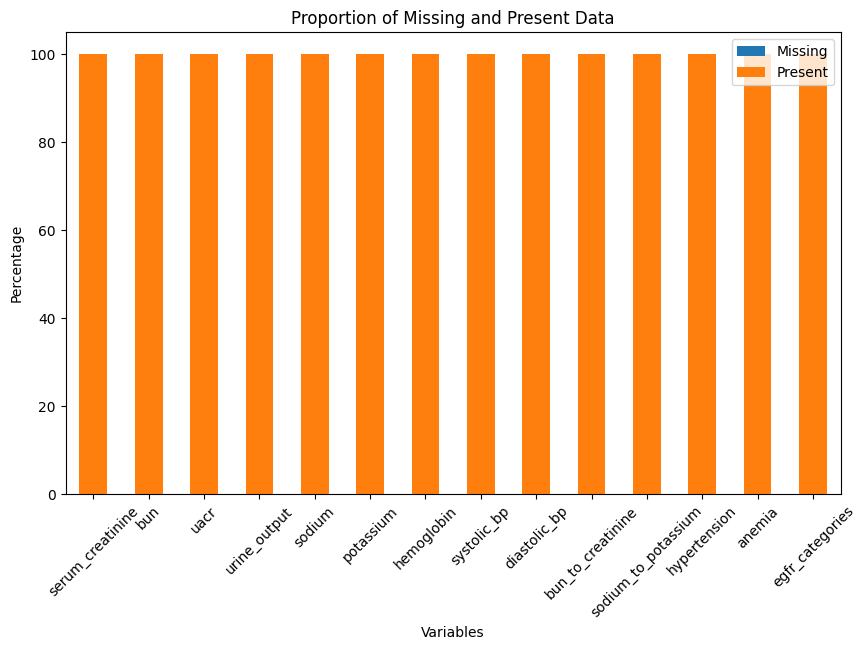

In [ ]:
# Calculate the proportions
missing_ratio = df_resampled.isnull().mean() * 100
present_ratio = 100 - missing_ratio

# Create a DataFrame for the plot
stack_data = pd.DataFrame({'Missing': missing_ratio, 'Present': present_ratio})

# Plot
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Missing and Present Data')
plt.xlabel('Variables')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


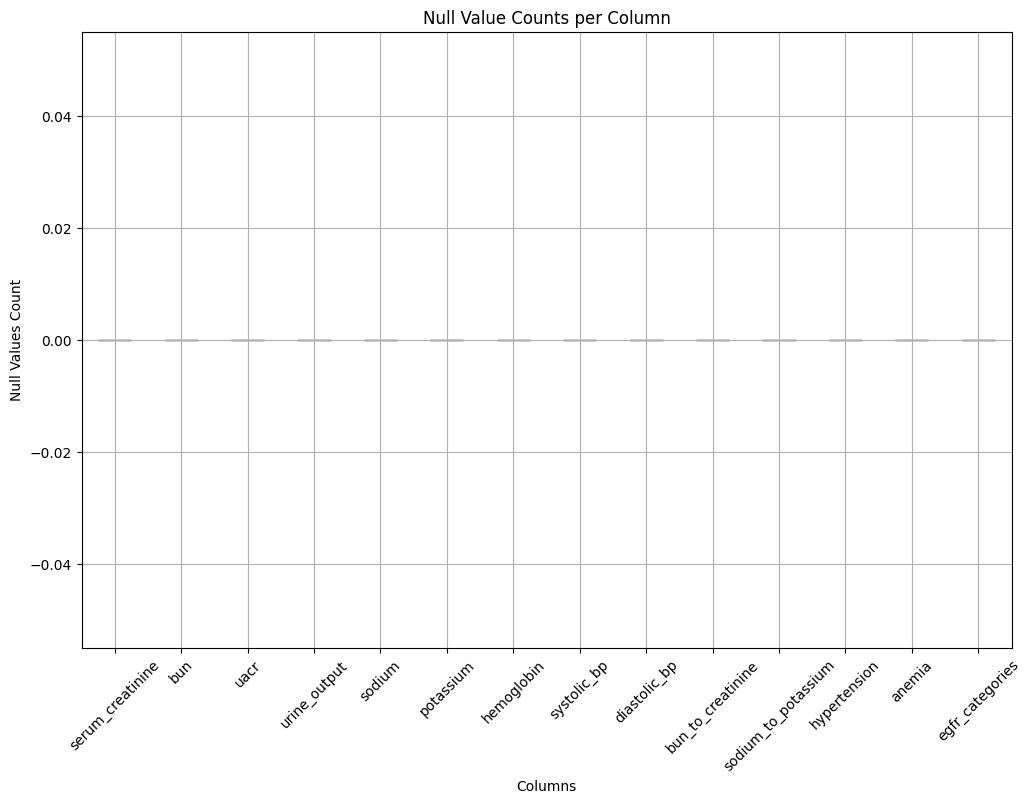

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
null_counts = df_resampled.isnull().sum()
# Plotting
plt.figure(figsize=(12, 8))  # Set the figure size as needed
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Null Value Counts per Column')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


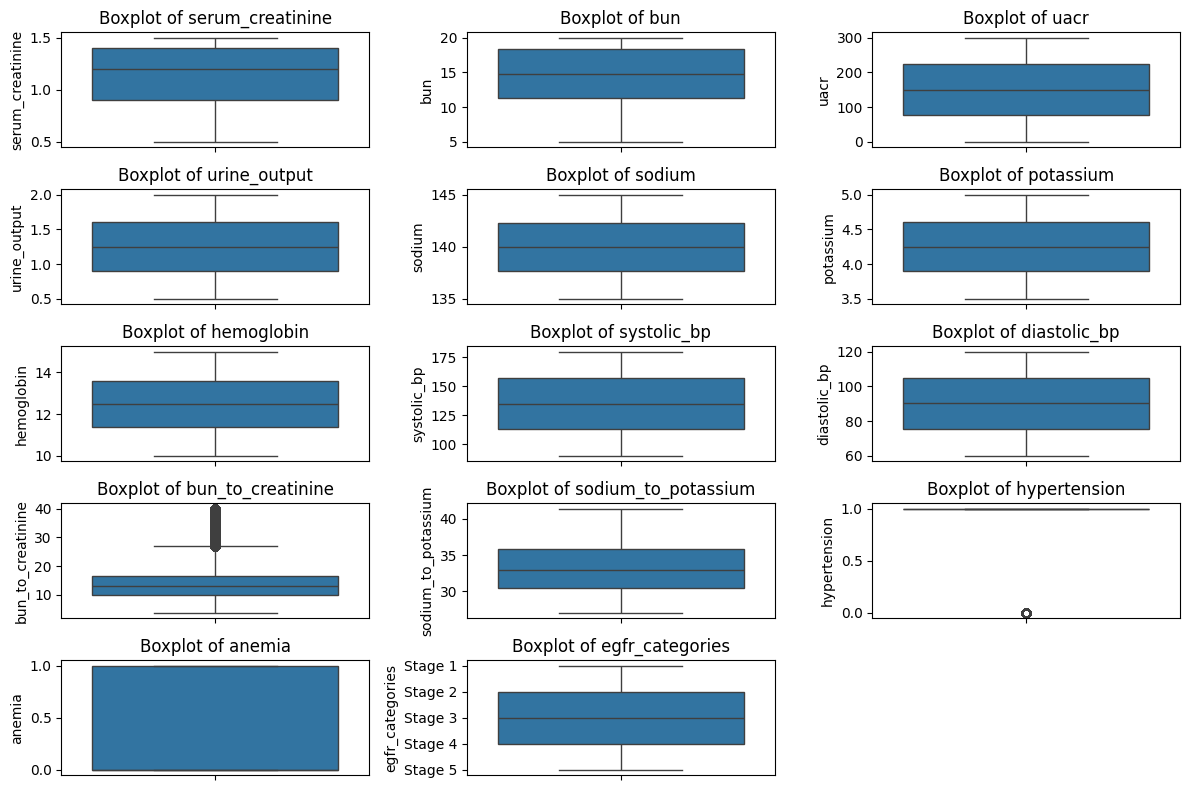

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_resampled.columns):
    plt.subplot((len(df_resampled.columns) + 2) // 3, 3, i + 1)
    sns.boxplot(y=df_resampled[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

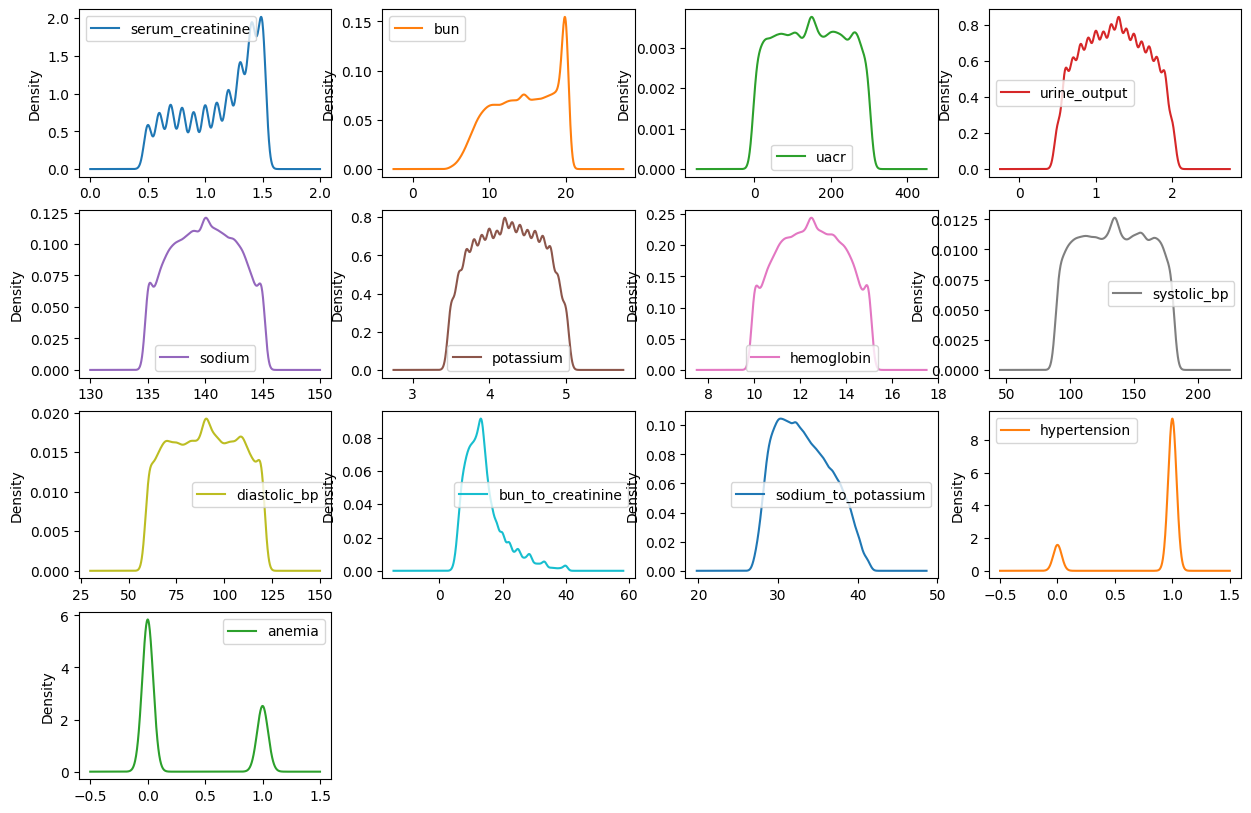

In [ ]:
# Density plot for each feature
df_resampled.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.show()


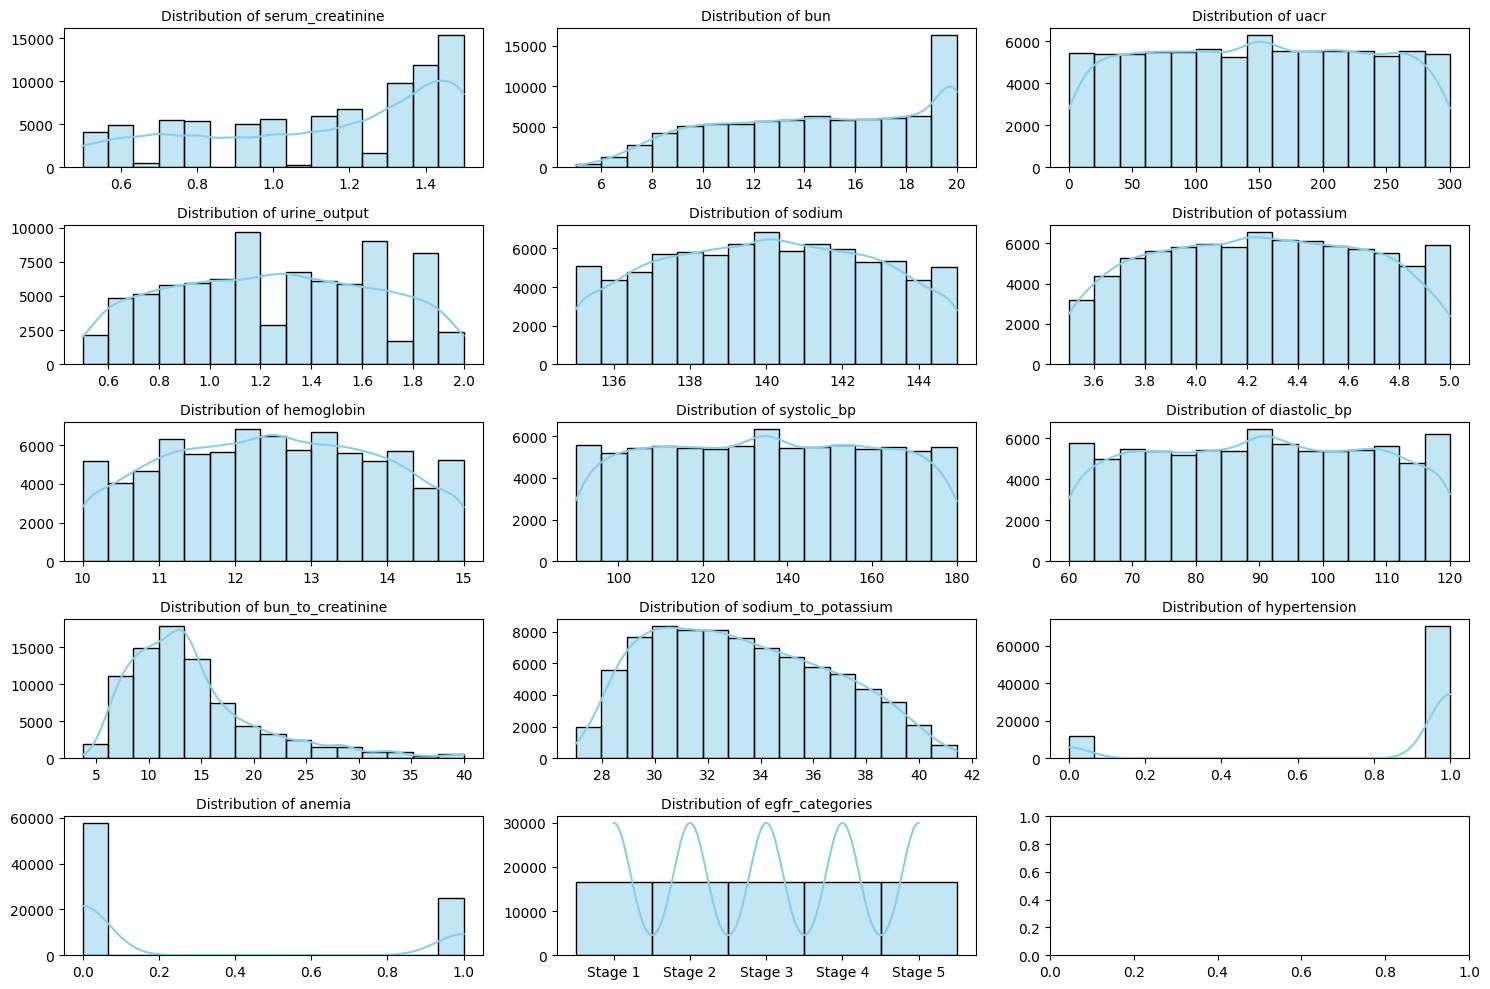

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
for idx, col in enumerate(df_resampled.columns ):
    ax = axes[idx//3, idx%3]
    sns.histplot(df_resampled[col], kde=True, ax=ax,color='skyblue',
                 edgecolor='black', bins=15,kde_kws={'bw_adjust': 1.5})
    ax.set_title(f'Distribution of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.tight_layout()

# Feature Selection

## ANOVA F-Score

In [ ]:
X= df_resampled.drop(['egfr_categories'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
# Select the top K features based on the F-test
anova_selector = SelectKBest(score_func=f_classif,k='all')
anova_selector.fit(X,  y)

# Extract feature scores and p-values
ftest = anova_selector.scores_
f_values = anova_selector.pvalues_
f_feature_names = X.columns

# Create a DataFrame for visualization
anova_df = pd.DataFrame({'Feature': f_feature_names, 'F-Score': ftest, 'P-Value': f_values})

# Sort by F-Score
anova_df = anova_df.sort_values(by='F-Score', ascending=False)

# Plot the F-scores
plt.figure(figsize=(12, 8))
plt.barh(anova_df['Feature'], anova_df['F-Score'], color='skyblue')
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.title('ANOVA F-Scores of Features')
plt.gca().invert_yaxis()  # To display the highest scores at the top
plt.show()

In [ ]:
# Filter significant features based on the p-value threshold
significance_level = 0.05
significant_indices = f_values < significance_level
significant_features = f_feature_names[significant_indices]
significant_f_scores = ftest[significant_indices]
significant_pvalues = f_values[significant_indices]

# Create a DataFrame for significant features
significant_f_df = pd.DataFrame({
    'Feature': significant_features,
    'F Score': significant_f_scores,
    'P-Value': significant_pvalues
})

# Sort by f Score
significant_f_df = significant_f_df.sort_values(by='F Score', ascending=False)

# Print the number of features and significant features
print("Original Number of Features:", len(f_feature_names))
print("Number of Significant Features:", len(significant_features))

# Display the significant features with their scores and p-values
print("Significant Features with F-Scores and P-Values:")
print(significant_f_df)

## Chi squared

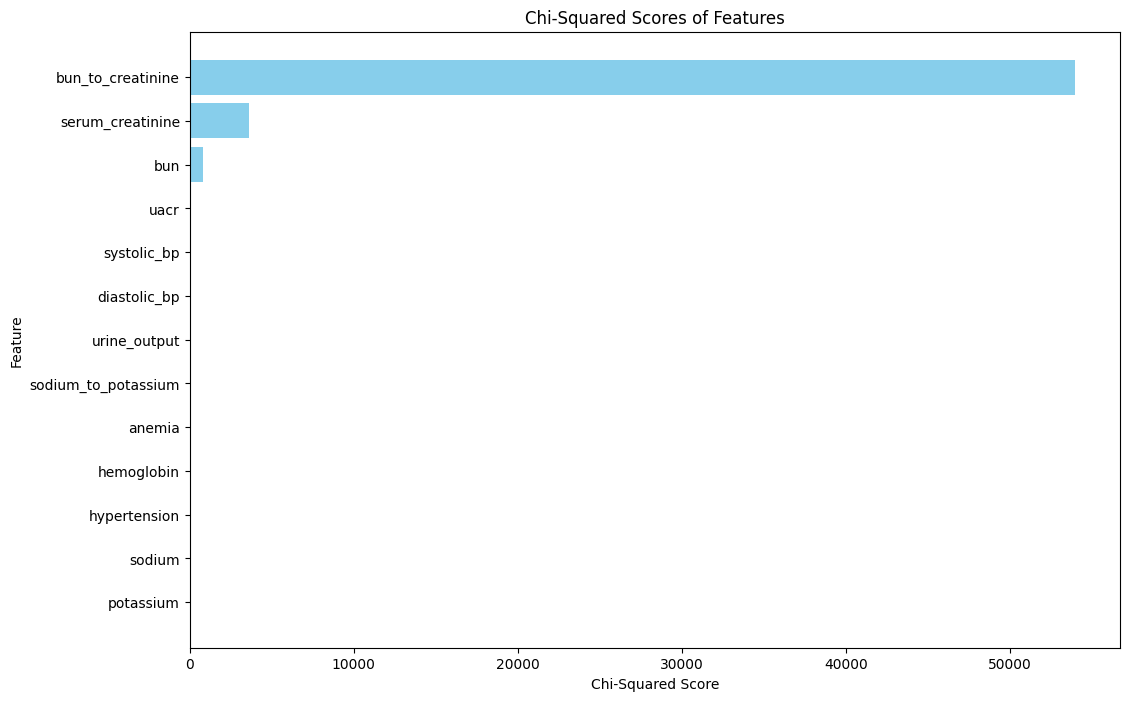

In [ ]:
 # Perform chi-squared test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X, y)

# Extract feature scores
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_
chi2_feature_names = X.columns

# Create a DataFrame for visualization
chi_df = pd.DataFrame({'Feature': chi2_feature_names, 'Chi-Squared Score': chi2_scores, 'P-Value': chi2_pvalues})

# Sort by Chi-Squared Score
chi_df = chi_df.sort_values(by='Chi-Squared Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 8))
plt.barh(chi_df['Feature'], chi_df['Chi-Squared Score'], color='skyblue')
plt.xlabel('Chi-Squared Score')
plt.ylabel('Feature')
plt.title('Chi-Squared Scores of Features')
plt.gca().invert_yaxis()  # To display the highest scores at the top
plt.show()

In [ ]:
# Filter significant features based on the p-value threshold
significance_level = 0.05
significant_indices = chi2_pvalues < significance_level
significant_features = chi2_feature_names[significant_indices]
significant_chi2_scores = chi2_scores[significant_indices]
significant_pvalues = chi2_pvalues[significant_indices]

# Create a DataFrame for significant features
significant_chi2_df = pd.DataFrame({
    'Feature': significant_features,
    'Chi2 Score': significant_chi2_scores,
    'P-Value': significant_pvalues
})

# Sort by Chi2 Score
significant_chi2_df = significant_chi2_df.sort_values(by='Chi2 Score',
                                                      ascending=False)

# Print the number of features and significant features
print("Original Number of Features:", len(chi2_feature_names))
print("Number of Significant Features:", len(significant_features))

# Display the significant features with their scores and p-values
print("Significant Features with Chi2 Scores and P-Values:")
print(significant_chi2_df)

Original Number of Features: 13
Number of Significant Features: 6
Significant Features with Chi2 Scores and P-Values:
             Feature    Chi2 Score        P-Value
5  bun_to_creatinine  54011.747387   0.000000e+00
0   serum_creatinine   3594.478574   0.000000e+00
1                bun    818.263659  8.496257e-176
2               uacr     73.498428   4.139301e-15
3        systolic_bp     12.841563   1.207646e-02
4       diastolic_bp     10.769028   2.928621e-02


## Mutual Information

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform Mutual Information test
mi_selector = SelectKBest(mutual_info_classif, k='all')
mi_selector.fit(X, y)

# Extract feature scores
mi_scores = mi_selector.scores_
mi_feature_names = X.columns

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': mi_feature_names, 'Mutual Information Score': mi_scores})

# Sort by Mutual Information Score
mi_df = mi_df.sort_values(by='Mutual Information Score', ascending=False)

# Plot the scores
plt.figure(figsize=(12, 8))
plt.barh(mi_df['Feature'], mi_df['Mutual Information Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Mutual Information Scores of Features')
plt.gca().invert_yaxis()  # To display the highest scores at the top
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)

# Retrieve the feature names from X
mi_feature_names = X.columns

# Create a DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': mi_feature_names,
    'MI Score': mi_scores
})

mi_threshold = 0.1
significant_mi_df = mi_df[mi_df['MI Score'] > mi_threshold]

# Sort by MI Score
significant_mi_df = significant_mi_df.sort_values(by='MI Score', ascending=False)

# Print the number of features and significant features
print("Original Number of Features:", len(mi_feature_names))
print("Number of Significant Features:", len(significant_mi_df))
# Display the significant features with their MI scores
print("Significant Features with MI Scores:")
print(significant_mi_df)

## VIF

In [ ]:
X= df_resampled.drop(['egfr_categories'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

# Create a DataFrame that will hold the feature names and their corresponding VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

                Feature           VIF
0                 const  14284.745086
11  sodium_to_potassium    111.208321
6             potassium    106.792825
10    bun_to_creatinine      9.965402
1      serum_creatinine      7.260729
5                sodium      5.293141
2                   bun      5.188321
13               anemia      2.274747
7            hemoglobin      2.238480
12         hypertension      1.610426
9          diastolic_bp      1.359392
8           systolic_bp      1.253923
4          urine_output      1.000402
3                  uacr      1.000241


In [ ]:
X= df_resampled.drop(['egfr_categories','sodium_to_potassium'],axis=1)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

# Create a DataFrame that will hold the feature names and their corresponding VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

              Feature          VIF
0               const  3034.463771
10  bun_to_creatinine     9.964064
1    serum_creatinine     7.259027
2                 bun     5.187604
12             anemia     2.274716
7          hemoglobin     2.238479
11       hypertension     1.610421
9        diastolic_bp     1.359380
8         systolic_bp     1.253582
4        urine_output     1.000392
5              sodium     1.000347
3                uacr     1.000233
6           potassium     1.000091


In [ ]:
X= df_resampled.drop(['egfr_categories','sodium_to_potassium',
                      'bun_to_creatinine'],axis=1)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X)

# Create a DataFrame that will hold the feature names and their corresponding VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

             Feature          VIF
0              const  2955.401328
11            anemia     2.267174
7         hemoglobin     2.235031
10      hypertension     1.610391
9       diastolic_bp     1.359331
8        systolic_bp     1.253526
1   serum_creatinine     1.049354
2                bun     1.019044
4       urine_output     1.000392
5             sodium     1.000316
3               uacr     1.000169
6          potassium     1.000084


# Model with All Features

In [ ]:
import os
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

In [ ]:
X= df_resampled.drop(['egfr_categories'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest


Random Forest Model
Accuracy: 0.7508272132999758
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.78      0.86      0.82      5066
Mild to Moderate Decreased       0.68      0.71      0.69      5036
                    Normal       0.87      0.85      0.86      4887
          Severe Decreased       0.71      0.62      0.66      4876
        Slightly Decreased       0.71      0.71      0.71      4917

                  accuracy                           0.75     24782
                 macro avg       0.75      0.75      0.75     24782
              weighted avg       0.75      0.75      0.75     24782

Confusion Matrix :
 [[4345  160    0  552    9]
 [ 150 3555    2  677  652]
 [   0    1 4162    0  724]
 [1041  771    0 3047   17]
 [   5  758  644   12 3498]]


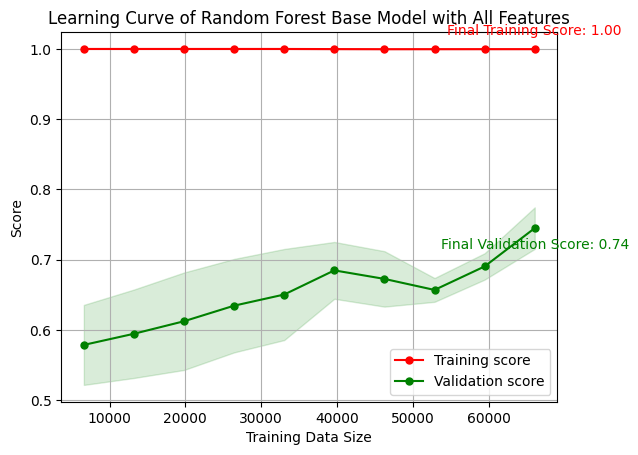

In [ ]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_base_rf.joblib')
joblib.dump(rf_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)
c_matrix= confusion_matrix(y_test, rf_y_pred)

print("\nRandom Forest Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_classifier,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Random Forest Base Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned Random Forest


Fine Tuned Random Forest Model
Accuracy: 0.7300056492615609
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.76      0.82      0.79      5066
Mild to Moderate Decreased       0.67      0.67      0.67      5036
                    Normal       0.84      0.85      0.85      4887
          Severe Decreased       0.67      0.62      0.64      4876
        Slightly Decreased       0.69      0.69      0.69      4917

                  accuracy                           0.73     24782
                 macro avg       0.73      0.73      0.73     24782
              weighted avg       0.73      0.73      0.73     24782

Confusion Matrix:
 [[4149  170    0  739    8]
 [ 200 3371    4  738  723]
 [   0    7 4141    0  739]
 [1074  750    0 3027   25]
 [   2  726  764   22 3403]]
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators':

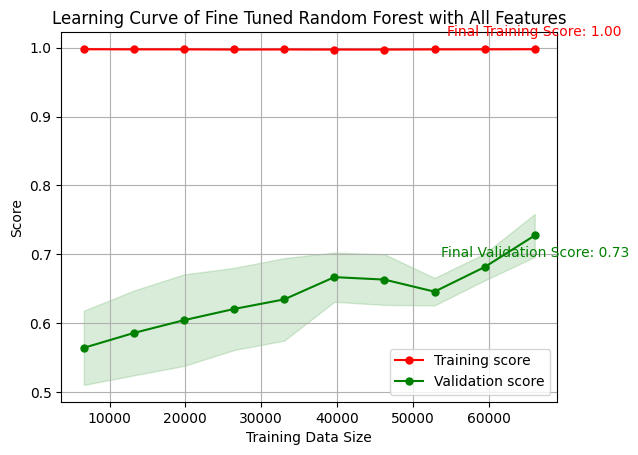

In [ ]:
# Define the parameter grid
rf_params = {
    'n_estimators': [2, 4 ,6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = rf_grid_search.best_estimator_

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_best_rf.joblib')
joblib.dump(best_rf, model_path)

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

print("\nFine Tuned Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Print the best parameters found by Grid Search
print("Best Parameters:", rf_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_rf,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Random Forest with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## XGBoost


XG Boost Model
Accuracy: 0.7214510531837625
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.78      0.77      5066
           1       0.66      0.67      0.66      5036
           2       0.86      0.85      0.86      4887
           3       0.63      0.58      0.60      4876
           4       0.70      0.71      0.71      4917

    accuracy                           0.72     24782
   macro avg       0.72      0.72      0.72     24782
weighted avg       0.72      0.72      0.72     24782

Confusion Matrix :
 [[3975  202    0  873   16]
 [ 147 3397    4  745  743]
 [   0    4 4173    0  710]
 [1148  883    0 2821   24]
 [   4  695  690   15 3513]]


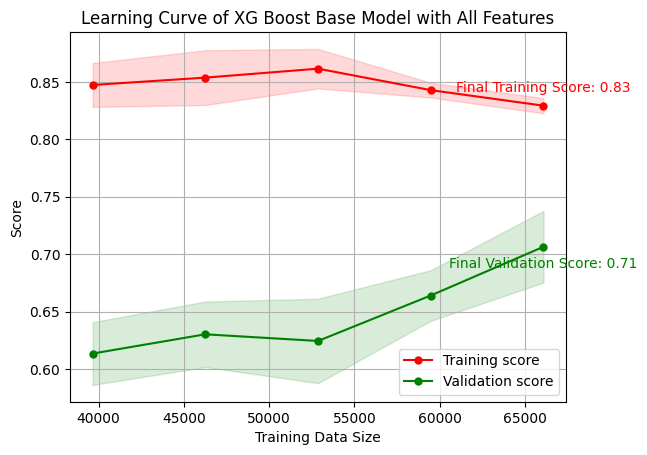

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_base_xgb.joblib')
joblib.dump(xgb_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
report = classification_report(y_test, xgb_y_pred)
c_matrix= confusion_matrix(y_test, xgb_y_pred)

print("\nXG Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_classifier,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of XG Boost Base Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned XG Boost

Fitting 3 folds for each of 243 candidates, totalling 729 fits

Fine Tuned XG Boost Model
Accuracy: 0.7075700104914857
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      5066
           1       0.65      0.68      0.66      5036
           2       0.87      0.85      0.86      4887
           3       0.60      0.53      0.56      4876
           4       0.70      0.72      0.71      4917

    accuracy                           0.71     24782
   macro avg       0.71      0.71      0.71     24782
weighted avg       0.71      0.71      0.71     24782

Confusion Matrix:
 [[3838  219    0  996   13]
 [ 133 3431    4  747  721]
 [   0    1 4159    0  727]
 [1357  910    0 2584   25]
 [   5  737  641   11 3523]]
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


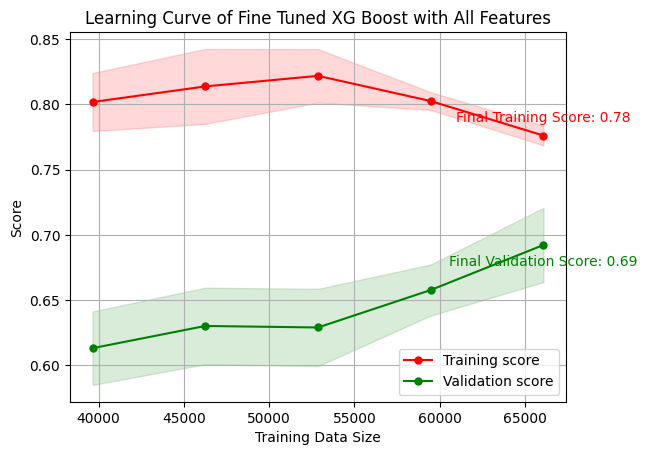

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_grid_search = GridSearchCV(xgb_classifier,xgb_params,scoring='accuracy',
                               n_jobs=-1,cv=3,verbose=1)

xgb_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_xgb = xgb_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'all_best_xgb.joblib')
joblib.dump(best_xgb, model_path)

# Evaluate the best Random Forest model
xgb_y_pred = best_xgb.predict(X_test)

print("\nFine Tuned XG Boost Model")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", xgb_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_xgb,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned XG Boost with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Ada Boost


Adaptive Boost Model
Accuracy: 0.4281333225728351
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.37      0.07      0.12      5066
Mild to Moderate Decreased       0.59      0.24      0.34      5036
                    Normal       0.70      0.23      0.35      4887
          Severe Decreased       0.36      0.89      0.51      4876
        Slightly Decreased       0.45      0.73      0.56      4917

                  accuracy                           0.43     24782
                 macro avg       0.49      0.43      0.37     24782
              weighted avg       0.49      0.43      0.37     24782

Confusion Matrix :
 [[ 362   61    0 4632   11]
 [ 230 1201   13 2990  602]
 [   1    1 1121    0 3764]
 [ 375  156    0 4328   17]
 [  15  615  469  220 3598]]


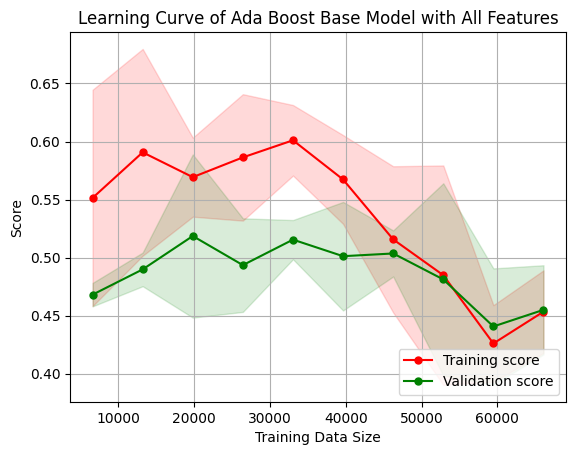

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost  = AdaBoostClassifier()

# Train the classifier
ada_boost.fit(X_train, y_train)
ada_boost_y_pred = ada_boost.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_base_ada.joblib')
joblib.dump(ada_boost, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, ada_boost_y_pred)
report = classification_report(y_test, ada_boost_y_pred)
c_matrix= confusion_matrix(y_test, ada_boost_y_pred)

print("\nAdaptive Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=ada_boost,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')
# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Ada Boost Base Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Ada Boost

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Fine Tuned Ada Boost Model
Accuracy: 0.6838431119360826
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.66      0.73      0.69      5066
Mild to Moderate Decreased       0.62      0.77      0.69      5036
                    Normal       0.90      0.82      0.86      4887
          Severe Decreased       0.52      0.40      0.46      4876
        Slightly Decreased       0.73      0.70      0.71      4917

                  accuracy                           0.68     24782
                 macro avg       0.68      0.68      0.68     24782
              weighted avg       0.68      0.68      0.68     24782

Confusion Matrix:
 [[3691  220    0 1145   10]
 [ 154 3853    0  634  395]
 [   0    6 4006    0  875]
 [1769 1129    0 1964   14]
 [   6 1003  465   10 3433]]
Best Parameters: {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 50}


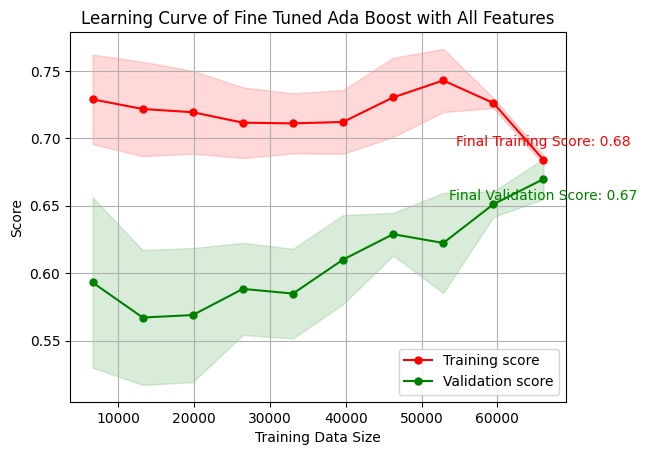

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Create the parameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

ada_boost  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Configure GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_ada = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'all_best_ada.joblib')
joblib.dump(best_ada, model_path)

# Make predictions with the best model
y_pred = best_ada.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Ada Boost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_ada,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Ada Boost with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression Model
Accuracy: 0.616253732547817
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.57      0.70      0.63      5066
Mild to Moderate Decreased       0.56      0.54      0.55      5036
                    Normal       0.84      0.84      0.84      4887
          Severe Decreased       0.44      0.33      0.38      4876
        Slightly Decreased       0.65      0.66      0.65      4917

                  accuracy                           0.62     24782
                 macro avg       0.61      0.62      0.61     24782
              weighted avg       0.61      0.62      0.61     24782

Confusion Matrix :
 [[3564  309    0 1158   35]
 [ 536 2725    2  855  918]
 [   0   19 4125    0  743]
 [2163 1038    0 1613   62]
 [  20  809  792   51 3245]]


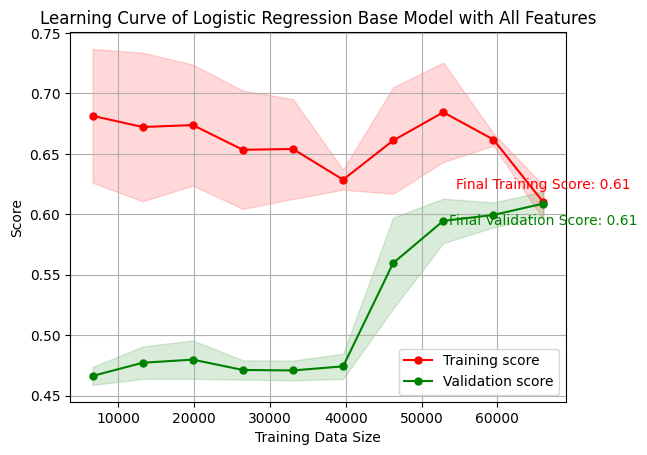

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_base_lr.joblib')
joblib.dump(log_reg, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred)
c_matrix= confusion_matrix(y_test, lr_y_pred)

print("\n Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=log_reg,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Logistic Regression Base Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Logistic Regression

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Fine Tuned Logistic Regression Model
Accuracy: 0.6672988459365669
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.65      0.69      0.67      5066
Mild to Moderate Decreased       0.63      0.66      0.64      5036
                    Normal       0.89      0.82      0.85      4887
          Severe Decreased       0.49      0.44      0.47      4876
        Slightly Decreased       0.69      0.72      0.71      4917

                  accuracy                           0.67     24782
                 macro avg       0.67      0.67      0.67     24782
              weighted avg       0.67      0.67      0.67     24782

Confusion Matrix:
 [[3507  211    0 1327   21]
 [ 174 3332    0  879  651]
 [   0    1 3988    0  898]
 [1746  944    0 2161   25]
 [   6  831  506   25 3549]]
Best Parameters: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}


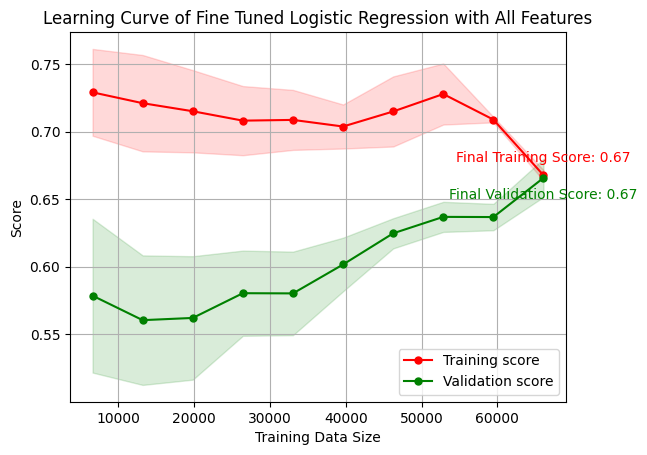

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

log_reg = LogisticRegression()

# Create the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strengths
    'penalty': ['l2','none'],   # Type of norm used in the penalization
    'solver': ['newton-cg', 'lbfgs', 'sag'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_lr = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'all_best_lr.joblib')
joblib.dump(best_lr, model_path)

# Make predictions with the best model
y_pred = best_lr.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot-
plt.title('Learning Curve of Fine Tuned Logistic Regression with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## LSVM

In [ ]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear SVM Model
Accuracy: 0.6148010652893229
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.57      0.84      0.68      5066
Mild to Moderate Decreased       0.60      0.38      0.47      5036
                    Normal       0.81      0.89      0.85      4887
          Severe Decreased       0.43      0.29      0.34      4876
        Slightly Decreased       0.61      0.68      0.64      4917

                  accuracy                           0.61     24782
                 macro avg       0.60      0.61      0.59     24782
              weighted avg       0.60      0.61      0.59     24782

Confusion Matrix :
 [[4233  155    0  634   44]
 [ 479 1938    3 1150 1466]
 [   0    8 4348    0  531]
 [2717  651    0 1390  118]
 [  14  496 1035   45 3327]]


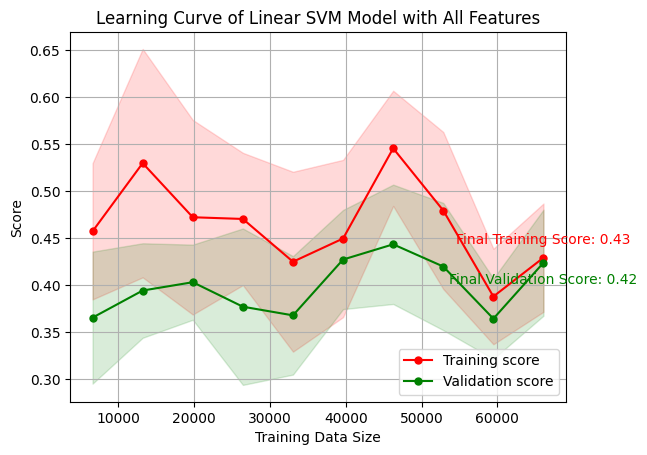

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a LinearSVC object
lsvc = LinearSVC()

# Train the model
lsvc.fit(X_train, y_train)

# Predict the labels of the test set
lsvc_y_pred = lsvc.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_base_lsvm.joblib')
joblib.dump(lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nLinear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Linear SVM Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned LSVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalt


Fine Tuned Linear SVM Model
Accuracy: 0.6148010652893229
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.57      0.84      0.68      5066
Mild to Moderate Decreased       0.60      0.38      0.47      5036
                    Normal       0.81      0.89      0.85      4887
          Severe Decreased       0.43      0.29      0.34      4876
        Slightly Decreased       0.61      0.68      0.64      4917

                  accuracy                           0.61     24782
                 macro avg       0.60      0.61      0.59     24782
              weighted avg       0.60      0.61      0.59     24782

Confusion Matrix :
 [[4233  155    0  634   44]
 [ 479 1938    3 1150 1466]
 [   0    8 4348    0  531]
 [2717  651    0 1390  118]
 [  14  496 1035   45 3327]]
Best Parameters: {'C': 100, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}


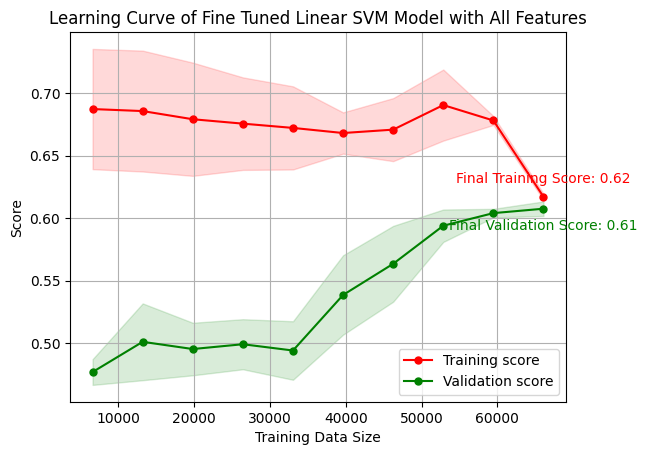

In [ ]:
lsvm_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Specifies the norm used in penalization
    'loss': ['hinge', 'squared_hinge'],  # Specifies the loss function
    'dual': [True, False]           # Dual or primal formulation
}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configure GridSearchCV
lsvm_grid_search = GridSearchCV(lsvc, lsvm_params,
                                cv=5, scoring='accuracy',
                                verbose=1, n_jobs=-1)
lsvm_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_lsvc = lsvm_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'all_best_lsvm.joblib')
joblib.dump(best_lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nFine Tuned Linear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Print the best parameters found by Grid Search
print("Best Parameters:", lsvm_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Linear SVM Model with All Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Model with F-Score Features

In [ ]:
X= df_resampled.drop(['egfr_categories','uacr','sodium_to_potassium','potassium','diastolic_bp',
                      'systolic_bp','hemoglobin'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest


Random Forest Model
Accuracy: 0.6759744976192398
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.67      0.72      0.69      5066
Mild to Moderate Decreased       0.63      0.64      0.64      5036
                    Normal       0.84      0.85      0.84      4887
          Severe Decreased       0.54      0.49      0.51      4876
        Slightly Decreased       0.68      0.69      0.68      4917

                  accuracy                           0.68     24782
                 macro avg       0.67      0.68      0.67     24782
              weighted avg       0.67      0.68      0.67     24782

Confusion Matrix :
 [[3642  215    0 1199   10]
 [ 212 3230    5  796  793]
 [   0    7 4133    0  747]
 [1559  915    0 2368   34]
 [  12  737  768   21 3379]]


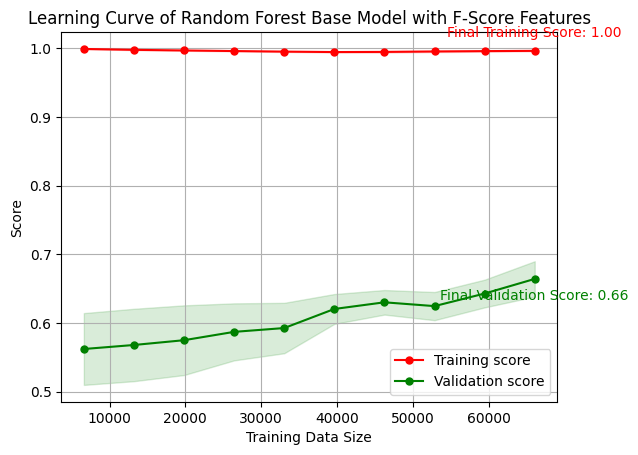

In [ ]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_base_rf.joblib')
joblib.dump(rf_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)
c_matrix= confusion_matrix(y_test, rf_y_pred)

print("\nRandom Forest Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_classifier,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Random Forest Base Model with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned Random Forest


Fine Tuned Random Forest Model
Accuracy: 0.6850133161165362
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.67      0.73      0.69      5066
Mild to Moderate Decreased       0.64      0.68      0.66      5036
                    Normal       0.86      0.84      0.85      4887
          Severe Decreased       0.53      0.46      0.49      4876
        Slightly Decreased       0.70      0.71      0.71      4917

                  accuracy                           0.69     24782
                 macro avg       0.68      0.68      0.68     24782
              weighted avg       0.68      0.69      0.68     24782

Confusion Matrix:
 [[3679  201    0 1175   11]
 [ 158 3440    3  761  674]
 [   0    2 4128    0  757]
 [1689  926    0 2238   23]
 [   6  766  644   10 3491]]
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1

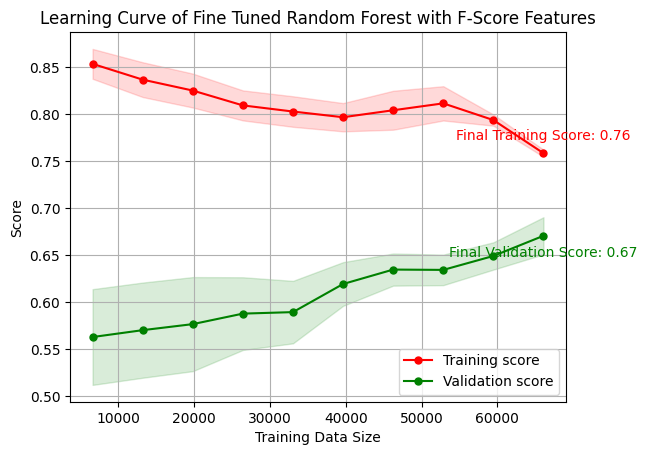

In [ ]:
# Define the parameter grid
rf_params = {
    'n_estimators': [2, 4 ,6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = rf_grid_search.best_estimator_

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_best_rf.joblib')
joblib.dump(best_rf, model_path)

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

print("\nFine Tuned Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Print the best parameters found by Grid Search
print("Best Parameters:", rf_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_rf,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Random Forest with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## XG Boost


XG Boost Model
Accuracy: 0.6835202969897506
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.70      0.69      5066
           1       0.65      0.67      0.66      5036
           2       0.87      0.85      0.86      4887
           3       0.53      0.48      0.50      4876
           4       0.70      0.72      0.71      4917

    accuracy                           0.68     24782
   macro avg       0.68      0.68      0.68     24782
weighted avg       0.68      0.68      0.68     24782

Confusion Matrix :
 [[3563  201    0 1291   11]
 [ 148 3361    7  790  730]
 [   0    4 4133    0  750]
 [1615  910    0 2327   24]
 [   7  714  633    8 3555]]


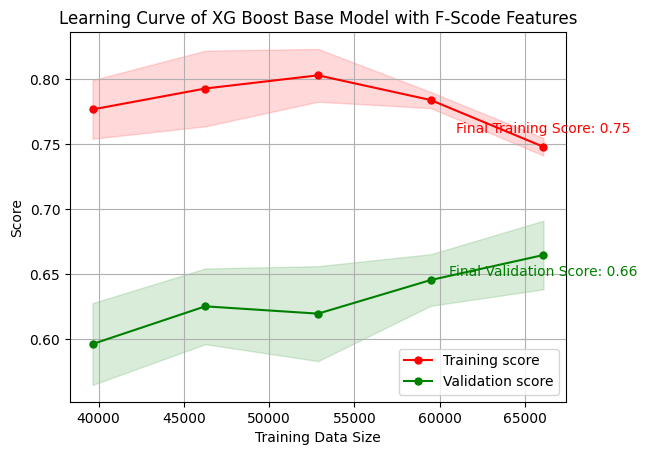

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_base_xgb.joblib')
joblib.dump(xgb_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
report = classification_report(y_test, xgb_y_pred)
c_matrix= confusion_matrix(y_test, xgb_y_pred)

print("\nXG Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_classifier,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of XG Boost Base Model with F-Scode Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned XG Boost

Fitting 3 folds for each of 243 candidates, totalling 729 fits

Fine Tuned XG Boost Model
Accuracy: 0.682672907755629
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69      5066
           1       0.64      0.67      0.66      5036
           2       0.87      0.84      0.86      4887
           3       0.52      0.46      0.49      4876
           4       0.70      0.73      0.71      4917

    accuracy                           0.68     24782
   macro avg       0.68      0.68      0.68     24782
weighted avg       0.68      0.68      0.68     24782

Confusion Matrix:
 [[3612  192    0 1248   14]
 [ 138 3362    2  795  739]
 [   0    2 4112    0  773]
 [1663  937    0 2255   21]
 [   7  724  598   11 3577]]
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


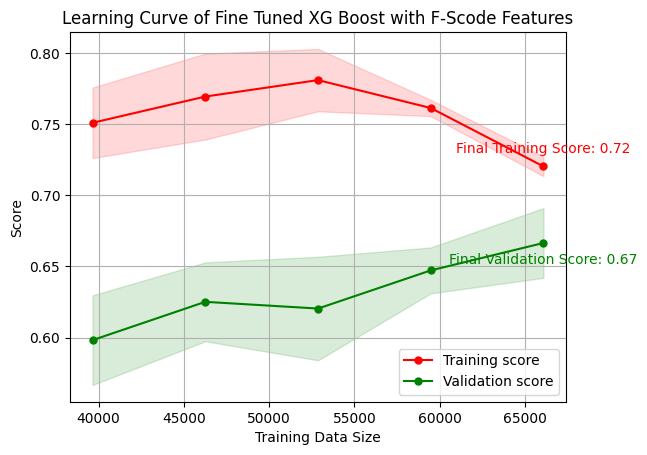

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Initialize and train classifier
xgb_classifier = XGBClassifier()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_grid_search = GridSearchCV(xgb_classifier,xgb_params,scoring='accuracy',
                               n_jobs=-1,cv=3,verbose=1)

xgb_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_xgb = xgb_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'f_best_xgb.joblib')
joblib.dump(best_xgb, model_path)

# Evaluate the best Random Forest model
xgb_y_pred = best_xgb.predict(X_test)

print("\nFine Tuned XG Boost Model")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", xgb_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_xgb,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned XG Boost with F-Scode Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Ada Boost


Adaptive Boost Model
Accuracy: 0.45843757565975307
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.50      0.11      0.18      5066
Mild to Moderate Decreased       0.52      0.67      0.58      5036
                    Normal       0.84      0.10      0.18      4887
          Severe Decreased       0.39      0.62      0.48      4876
        Slightly Decreased       0.44      0.80      0.57      4917

                  accuracy                           0.46     24782
                 macro avg       0.54      0.46      0.40     24782
              weighted avg       0.54      0.46      0.40     24782

Confusion Matrix :
 [[ 554  879    0 3624    9]
 [ 111 3354    0 1004  567]
 [   0    1  497    0 4389]
 [ 439 1414    0 3007   16]
 [   1  843   92   32 3949]]


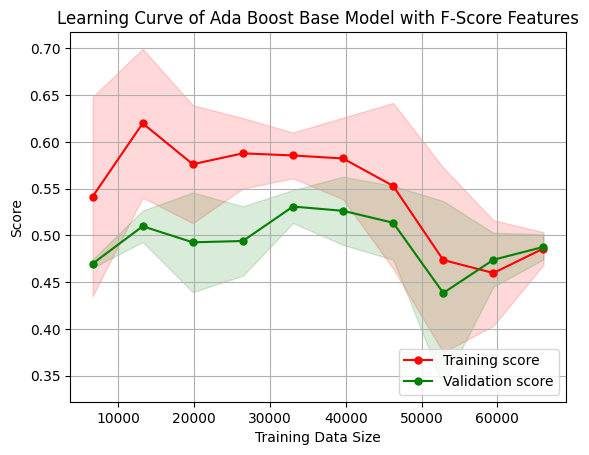

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost  = AdaBoostClassifier()

# Train the classifier
ada_boost.fit(X_train, y_train)
ada_boost_y_pred = ada_boost.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_base_ada.joblib')
joblib.dump(ada_boost, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, ada_boost_y_pred)
report = classification_report(y_test, ada_boost_y_pred)
c_matrix= confusion_matrix(y_test, ada_boost_y_pred)

print("\nAdaptive Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=ada_boost,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Create the plot
plt.title('Learning Curve of Ada Boost Base Model with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Ada Boost

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Fine Tuned Ada Boost Model
Accuracy: 0.6877572431603584
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.67      0.73      0.70      5066
Mild to Moderate Decreased       0.62      0.77      0.69      5036
                    Normal       0.90      0.82      0.86      4887
          Severe Decreased       0.53      0.42      0.47      4876
        Slightly Decreased       0.73      0.70      0.71      4917

                  accuracy                           0.69     24782
                 macro avg       0.69      0.69      0.68     24782
              weighted avg       0.69      0.69      0.68     24782

Confusion Matrix:
 [[3686  237    0 1134    9]
 [ 134 3869    0  640  393]
 [   0    8 4007    0  872]
 [1707 1106    0 2049   14]
 [   6 1003  465   10 3433]]
Best Parameters: {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 50}


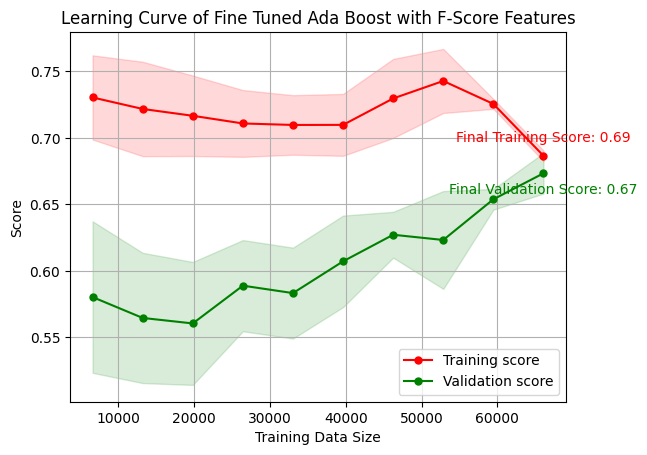

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Create the parameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

ada_boost  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Configure GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_ada = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'f_best_ada.joblib')
joblib.dump(best_ada, model_path)

# Make predictions with the best model
y_pred = best_ada.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Ada Boost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_ada,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Ada Boost with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression Model
Accuracy: 0.6697199580340569
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.65      0.70      0.68      5066
Mild to Moderate Decreased       0.63      0.67      0.65      5036
                    Normal       0.89      0.81      0.85      4887
          Severe Decreased       0.49      0.47      0.48      4876
        Slightly Decreased       0.70      0.70      0.70      4917

                  accuracy                           0.67     24782
                 macro avg       0.67      0.67      0.67     24782
              weighted avg       0.67      0.67      0.67     24782

Confusion Matrix :
 [[3565  167    0 1311   23]
 [ 181 3351    0 1017  487]
 [   0    1 3948    0  938]
 [1700  851    0 2300   25]
 [   7  980  465   32 3433]]


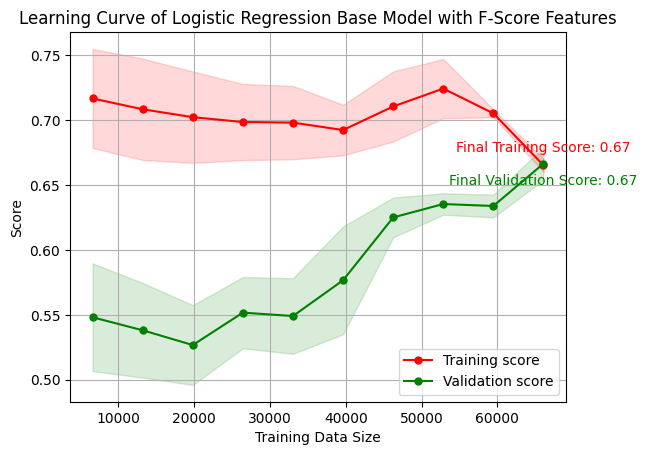

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_base_lr.joblib')
joblib.dump(log_reg, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred)
c_matrix= confusion_matrix(y_test, lr_y_pred)

print("\n Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=log_reg,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Logistic Regression Base Model with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Logistic Regression

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(



Fine Tuned Logistic Regression Model
Accuracy: 0.6675006052780244
Classification Report:
                             precision    recall  f1-score   support

            Kidney Failure       0.65      0.68      0.66      5066
Mild to Moderate Decreased       0.62      0.69      0.65      5036
                    Normal       0.89      0.81      0.85      4887
          Severe Decreased       0.50      0.44      0.47      4876
        Slightly Decreased       0.69      0.72      0.70      4917

                  accuracy                           0.67     24782
                 macro avg       0.67      0.67      0.67     24782
              weighted avg       0.67      0.67      0.67     24782

Confusion Matrix:
 [[3456  230    0 1357   23]
 [ 185 3464    0  799  588]
 [   0    0 3960    0  927]
 [1692 1014    0 2145   25]
 [   9  909  465   17 3517]]
Best Parameters: {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}


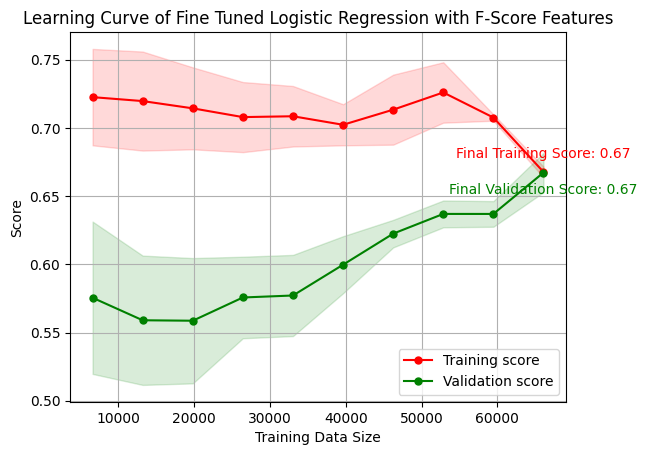

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Create the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strengths
    'penalty': ['l2','none'],   # Type of norm used in the penalization
    'solver': ['newton-cg', 'lbfgs', 'sag'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_lr = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'f_best_lr.joblib')
joblib.dump(best_lr, model_path)

# Make predictions with the best model
y_pred = best_lr.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot-
plt.title('Learning Curve of Fine Tuned Logistic Regression with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## LSVM

In [ ]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Linear SVM Model
Accuracy: 0.6158502138649019
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.56      0.86      0.68      5066
Mild to Moderate Decreased       0.60      0.39      0.47      5036
                    Normal       0.80      0.90      0.85      4887
          Severe Decreased       0.44      0.26      0.33      4876
        Slightly Decreased       0.60      0.67      0.64      4917

                  accuracy                           0.62     24782
                 macro avg       0.60      0.62      0.59     24782
              weighted avg       0.60      0.62      0.59     24782

Confusion Matrix :
 [[4364  172    0  489   41]
 [ 535 1940    3 1059 1499]
 [   0    4 4379    0  504]
 [2858  623    0 1276  119]
 [  14  478 1068   54 3303]]


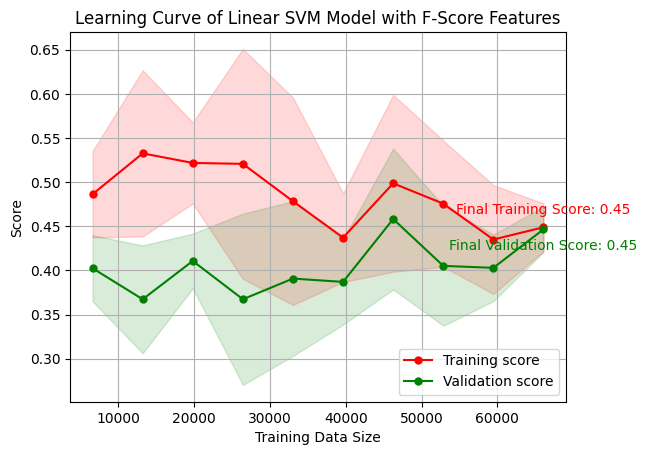

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a LinearSVC object
lsvc = LinearSVC()

# Train the model
lsvc.fit(X_train, y_train)

# Predict the labels of the test set
lsvc_y_pred = lsvc.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_base_lsvm.joblib')
joblib.dump(lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nLinear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Linear SVM Model with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned LSVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalt


Fine Tuned Linear SVM Model
Accuracy: 0.6158502138649019
Classification Report :
                             precision    recall  f1-score   support

            Kidney Failure       0.56      0.86      0.68      5066
Mild to Moderate Decreased       0.60      0.39      0.47      5036
                    Normal       0.80      0.90      0.85      4887
          Severe Decreased       0.44      0.26      0.33      4876
        Slightly Decreased       0.60      0.67      0.64      4917

                  accuracy                           0.62     24782
                 macro avg       0.60      0.62      0.59     24782
              weighted avg       0.60      0.62      0.59     24782

Confusion Matrix :
 [[4364  172    0  489   41]
 [ 535 1940    3 1059 1499]
 [   0    4 4379    0  504]
 [2858  623    0 1276  119]
 [  14  478 1068   54 3303]]
Best Parameters: {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}


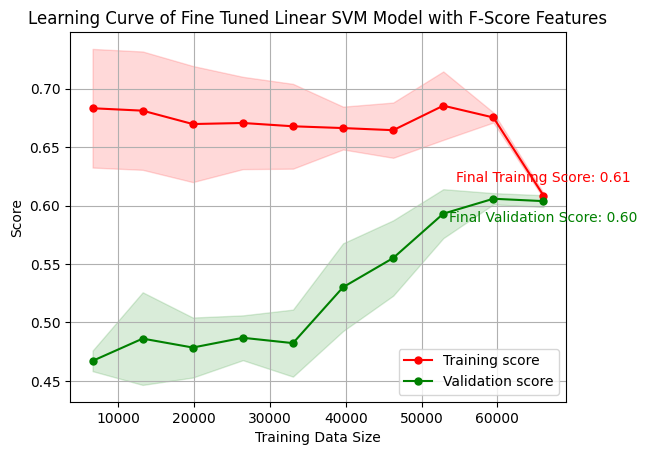

In [ ]:
lsvm_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Specifies the norm used in penalization
    'loss': ['hinge', 'squared_hinge'],  # Specifies the loss function
    'dual': [True, False]           # Dual or primal formulation
}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configure GridSearchCV
lsvm_grid_search = GridSearchCV(lsvc, lsvm_params,
                                cv=5, scoring='accuracy',
                                verbose=1, n_jobs=-1)
lsvm_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_lsvc = lsvm_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'f_best_lsvm.joblib')
joblib.dump(best_lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nFine Tuned Linear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Print the best parameters found by Grid Search
print("Best Parameters:", lsvm_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Linear SVM Model with F-Score Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Model with Mutual Information Features

In [ ]:
X= df_resampled.drop(['egfr_categories','hypertension','anemia'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest


Random Forest Model
Accuracy: 0.7499394721975627
Classification Report :
               precision    recall  f1-score   support

     Stage 1       0.86      0.85      0.86      4928
     Stage 2       0.71      0.71      0.71      4917
     Stage 3       0.68      0.70      0.69      5076
     Stage 4       0.72      0.64      0.68      4980
     Stage 5       0.78      0.85      0.81      4881

    accuracy                           0.75     24782
   macro avg       0.75      0.75      0.75     24782
weighted avg       0.75      0.75      0.75     24782

Confusion Matrix :
 [[4207  720    1    0    0]
 [ 684 3479  737   12    5]
 [   2  687 3561  665  161]
 [   0   19  759 3200 1002]
 [   0   11  157  575 4138]]


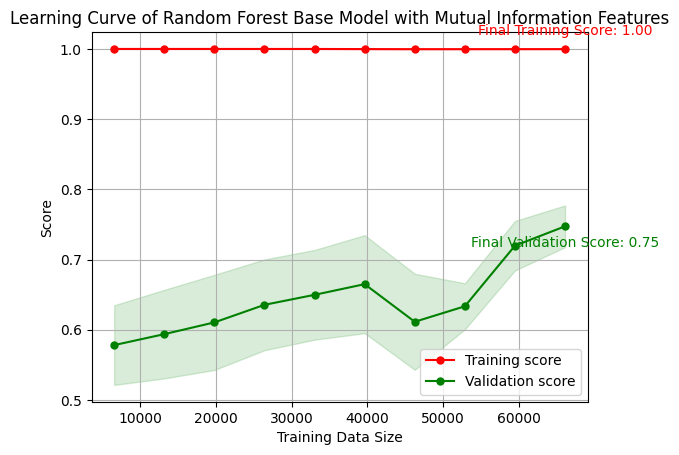

In [ ]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_base_rf.joblib')
joblib.dump(rf_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)
c_matrix= confusion_matrix(y_test, rf_y_pred)

print("\nRandom Forest Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_classifier,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Random Forest Base Model with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned Random Forest


Fine Tuned Random Forest Model
Accuracy: 0.7371479299491567
Classification Report:
               precision    recall  f1-score   support

     Stage 1       0.84      0.86      0.85      4928
     Stage 2       0.70      0.70      0.70      4917
     Stage 3       0.68      0.67      0.67      5076
     Stage 4       0.68      0.65      0.66      4980
     Stage 5       0.78      0.82      0.80      4881

    accuracy                           0.74     24782
   macro avg       0.74      0.74      0.74     24782
weighted avg       0.74      0.74      0.74     24782

Confusion Matrix:
 [[4246  677    5    0    0]
 [ 779 3423  690   19    6]
 [   5  751 3396  733  191]
 [   0   30  778 3220  952]
 [   1   10  152  735 3983]]
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


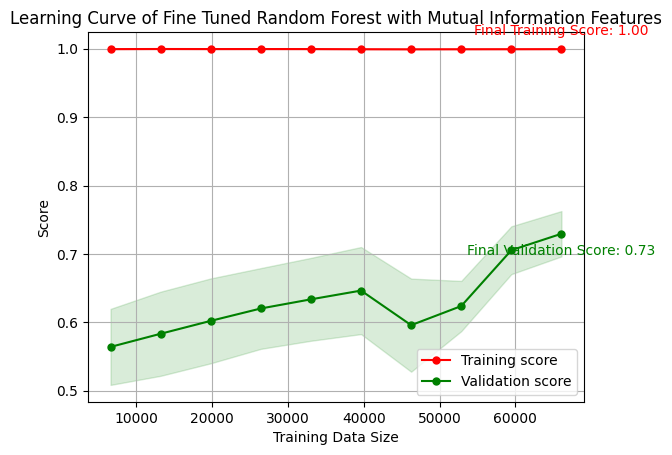

In [ ]:
# Define the parameter grid
rf_params = {
    'n_estimators': [2, 4 ,6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = rf_grid_search.best_estimator_

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_best_rf.joblib')
joblib.dump(best_rf, model_path)

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

print("\nFine Tuned Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Print the best parameters found by Grid Search
print("Best Parameters:", rf_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_rf,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Random Forest with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## XG Boost


XG Boost Model
Accuracy: 0.7173755144863208
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4928
           1       0.70      0.71      0.71      4917
           2       0.66      0.68      0.67      5076
           3       0.64      0.56      0.60      4980
           4       0.72      0.79      0.75      4881

    accuracy                           0.72     24782
   macro avg       0.72      0.72      0.72     24782
weighted avg       0.72      0.72      0.72     24782

Confusion Matrix :
 [[4209  717    2    0    0]
 [ 670 3502  725   15    5]
 [   2  729 3428  747  170]
 [   0   22  819 2797 1342]
 [   0   10  195  834 3842]]


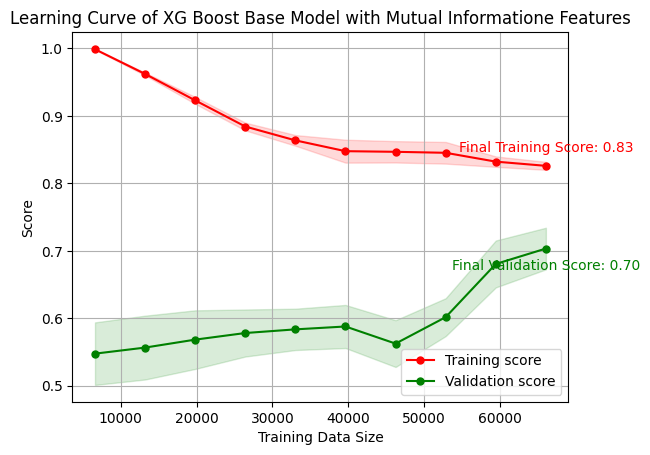

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_base_xgb.joblib')
joblib.dump(xgb_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
report = classification_report(y_test, xgb_y_pred)
c_matrix= confusion_matrix(y_test, xgb_y_pred)

print("\nXG Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_classifier,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of XG Boost Base Model with Mutual Informatione Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned XG Boost

Fitting 3 folds for each of 243 candidates, totalling 729 fits

Fine Tuned XG Boost Model
Accuracy: 0.7128561052376725
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4928
           1       0.70      0.71      0.71      4917
           2       0.66      0.69      0.67      5076
           3       0.62      0.54      0.58      4980
           4       0.71      0.78      0.74      4881

    accuracy                           0.71     24782
   macro avg       0.71      0.71      0.71     24782
weighted avg       0.71      0.71      0.71     24782

Confusion Matrix:
 [[4187  740    1    0    0]
 [ 633 3498  768   12    6]
 [   1  698 3503  727  147]
 [   0   25  860 2667 1428]
 [   0   15  190  865 3811]]
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


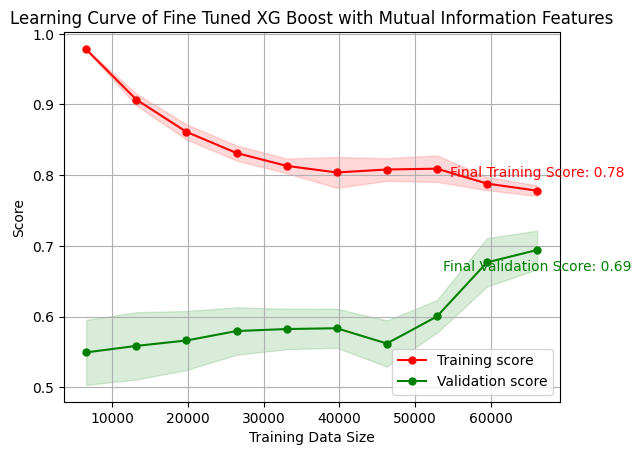

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_grid_search = GridSearchCV(xgb_classifier,xgb_params,scoring='accuracy',
                               n_jobs=-1,cv=3,verbose=1)

xgb_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_xgb = xgb_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'm_best_xgb.joblib')
joblib.dump(best_xgb, model_path)

# Evaluate the best Random Forest model
xgb_y_pred = best_xgb.predict(X_test)

print("\nFine Tuned XG Boost Model")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", xgb_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_xgb,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned XG Boost with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Ada Boost


Adaptive Boost Model
Accuracy: 0.4241788394802679
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.28      0.40      4928
           1       0.45      0.68      0.54      4917
           2       0.37      0.84      0.51      5076
           3       0.41      0.29      0.34      4980
           4       0.39      0.01      0.02      4881

    accuracy                           0.42     24782
   macro avg       0.46      0.42      0.36     24782
weighted avg       0.46      0.42      0.36     24782

Confusion Matrix :
 [[1395 3532    1    0    0]
 [ 643 3338  927    6    3]
 [  14  479 4276  276   31]
 [   0   15 3463 1447   55]
 [   0   10 2980 1835   56]]


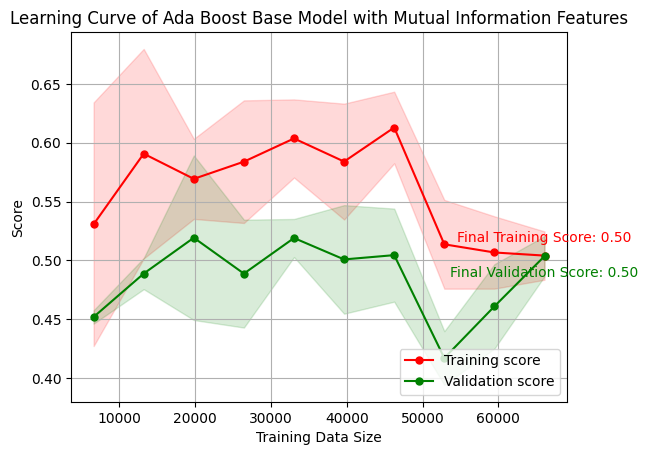

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost  = AdaBoostClassifier()

# Train the classifier
ada_boost.fit(X_train, y_train)
ada_boost_y_pred = ada_boost.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_base_ada.joblib')
joblib.dump(ada_boost, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, ada_boost_y_pred)
report = classification_report(y_test, ada_boost_y_pred)
c_matrix= confusion_matrix(y_test, ada_boost_y_pred)

print("\nAdaptive Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=ada_boost,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Ada Boost Base Model with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Ada Boost

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Fine Tuned Ada Boost Model
Accuracy: 0.6875554838189009
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      4928
           1       0.73      0.70      0.71      4917
           2       0.62      0.77      0.69      5076
           3       0.55      0.42      0.47      4980
           4       0.66      0.73      0.69      4881

    accuracy                           0.69     24782
   macro avg       0.69      0.69      0.68     24782
weighted avg       0.69      0.69      0.68     24782

Confusion Matrix:
 [[4044  871   13    0    0]
 [ 465 3433 1003   10    6]
 [   0  391 3911  638  136]
 [   0   14 1164 2068 1734]
 [   0   10  216 1072 3583]]
Best Parameters: {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 50}


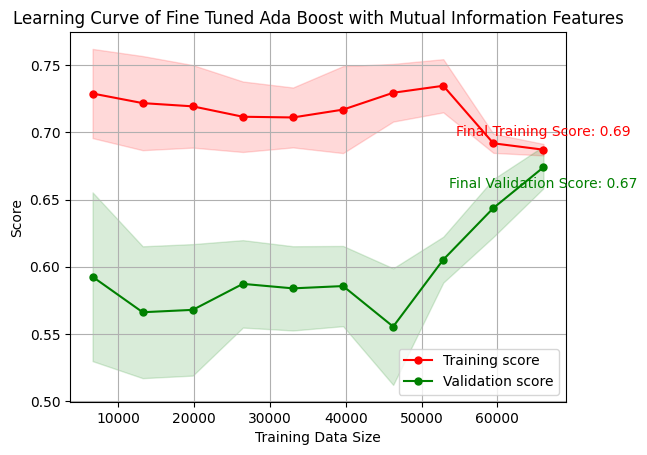

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Create the parameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

ada_boost  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Configure GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_ada = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'm_best_ada.joblib')
joblib.dump(best_ada, model_path)

# Make predictions with the best model
y_pred = best_ada.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Ada Boost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_ada,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Ada Boost with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression Model
Accuracy: 0.6145589540795738
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4928
           1       0.65      0.68      0.67      4917
           2       0.55      0.57      0.56      5076
           3       0.44      0.28      0.34      4980
           4       0.54      0.71      0.62      4881

    accuracy                           0.61     24782
   macro avg       0.61      0.62      0.61     24782
weighted avg       0.61      0.61      0.60     24782

Confusion Matrix :
 [[4123  790   15    0    0]
 [ 715 3342  799   44   17]
 [   1  892 2906  705  572]
 [   0   55 1228 1375 2322]
 [   0   35  361 1001 3484]]


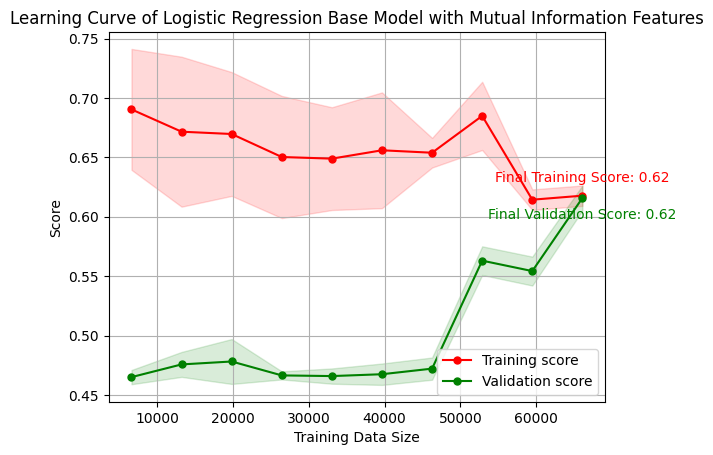

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_base_lr.joblib')
joblib.dump(log_reg, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred)
c_matrix= confusion_matrix(y_test, lr_y_pred)

print("\n Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=log_reg,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Logistic Regression Base Model with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Logistic Regression

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Fine Tuned Logistic Regression Model
Accuracy: 0.6677830683560649
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      4928
           1       0.69      0.71      0.70      4917
           2       0.61      0.69      0.65      5076
           3       0.51      0.42      0.46      4980
           4       0.64      0.70      0.67      4881

    accuracy                           0.67     24782
   macro avg       0.67      0.67      0.67     24782
weighted avg       0.67      0.67      0.67     24782

Confusion Matrix:
 [[4005  922    1    0    0]
 [ 465 3501  923   20    8]
 [   0  581 3503  788  204]
 [   0   28 1100 2107 1745]
 [   0   32  220 1196 3433]]
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


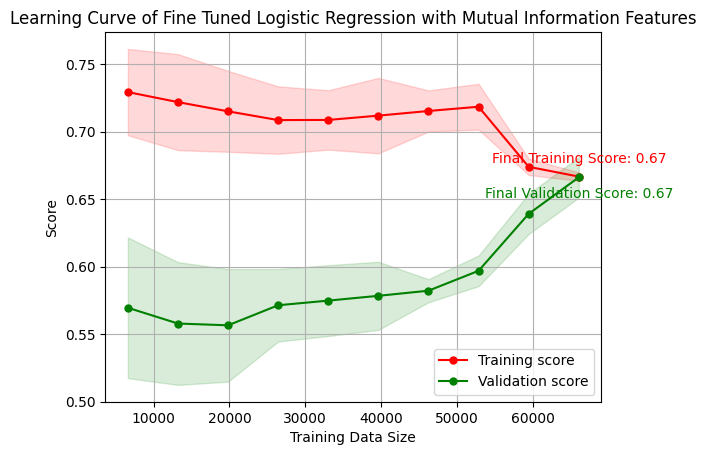

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Create the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strengths
    'penalty': ['l2','none'],   # Type of norm used in the penalization
    'solver': ['newton-cg', 'lbfgs', 'sag'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_lr = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'm_best_lr.joblib')
joblib.dump(best_lr, model_path)

# Make predictions with the best model
y_pred = best_lr.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot-
plt.title('Learning Curve of Fine Tuned Logistic Regression with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## LSVM

In [ ]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Linear SVM Model
Accuracy: 0.6111290452747962
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      4928
           1       0.59      0.68      0.63      4917
           2       0.60      0.37      0.46      5076
           3       0.46      0.27      0.34      4980
           4       0.54      0.86      0.67      4881

    accuracy                           0.61     24782
   macro avg       0.60      0.61      0.59     24782
weighted avg       0.60      0.61      0.59     24782

Confusion Matrix :
 [[4404  520    4    0    0]
 [1063 3319  477   42   16]
 [   1 1560 1890 1020  605]
 [   0  138  610 1325 2907]
 [   0   48  155  471 4207]]


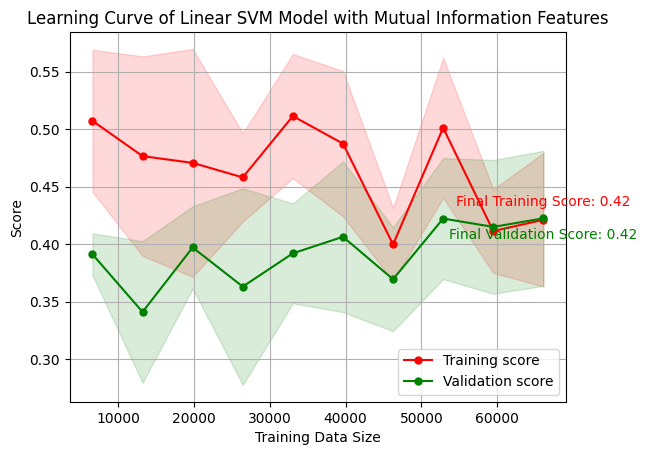

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a LinearSVC object
lsvc = LinearSVC()

# Train the model
lsvc.fit(X_train, y_train)

# Predict the labels of the test set
lsvc_y_pred = lsvc.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_base_lsvm.joblib')
joblib.dump(lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nLinear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Linear SVM Model with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned LSVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalt


Fine Tuned Linear SVM Model
Accuracy: 0.6111290452747962
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      4928
           1       0.59      0.68      0.63      4917
           2       0.60      0.37      0.46      5076
           3       0.46      0.27      0.34      4980
           4       0.54      0.86      0.67      4881

    accuracy                           0.61     24782
   macro avg       0.60      0.61      0.59     24782
weighted avg       0.60      0.61      0.59     24782

Confusion Matrix :
 [[4404  520    4    0    0]
 [1063 3319  477   42   16]
 [   1 1560 1890 1020  605]
 [   0  138  610 1325 2907]
 [   0   48  155  471 4207]]
Best Parameters: {'C': 10, 'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2'}


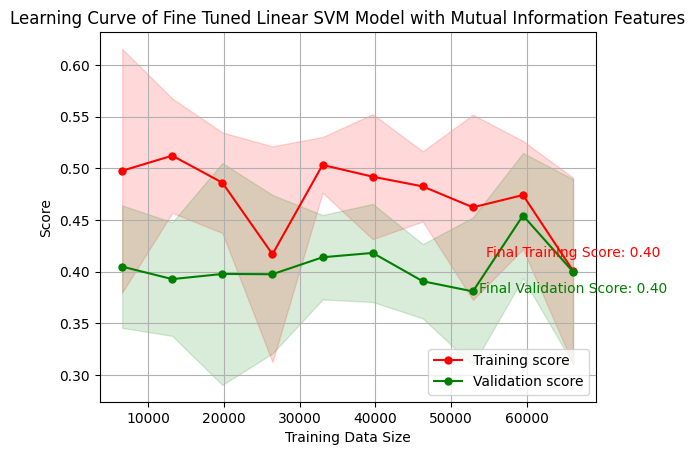

In [ ]:
lsvm_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Specifies the norm used in penalization
    'loss': ['hinge', 'squared_hinge'],  # Specifies the loss function
    'dual': [True, False]           # Dual or primal formulation
}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configure GridSearchCV
lsvm_grid_search = GridSearchCV(lsvc, lsvm_params,
                                cv=5, scoring='accuracy',
                                verbose=1, n_jobs=-1)
lsvm_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_lsvc = lsvm_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'm_best_lsvm.joblib')
joblib.dump(best_lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nFine Tuned Linear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Print the best parameters found by Grid Search
print("Best Parameters:", lsvm_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Linear SVM Model with Mutual Information Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Model with VIF Features

In [ ]:
X= df_resampled.drop(['egfr_categories','sodium_to_potassium',
                      'bun_to_creatinine'],axis=1)
y= df_resampled['egfr_categories']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Random Forest


Random Forest Model
Accuracy: 0.753732547816964
Classification Report :
               precision    recall  f1-score   support

     Stage 1       0.87      0.85      0.86      4928
     Stage 2       0.72      0.72      0.72      4917
     Stage 3       0.68      0.71      0.70      5076
     Stage 4       0.72      0.64      0.68      4980
     Stage 5       0.78      0.85      0.82      4881

    accuracy                           0.75     24782
   macro avg       0.75      0.75      0.75     24782
weighted avg       0.75      0.75      0.75     24782

Confusion Matrix :
 [[4208  719    1    0    0]
 [ 619 3521  763   11    3]
 [   7  651 3614  666  138]
 [   0   17  778 3179 1006]
 [   0   10  165  549 4157]]


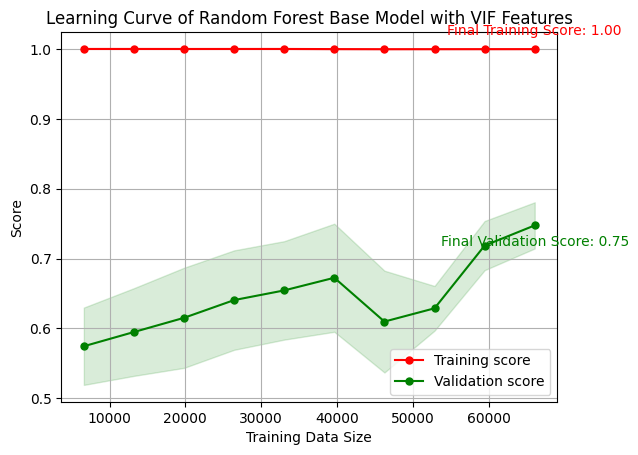

In [ ]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_base_rf.joblib')
joblib.dump(rf_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
report = classification_report(y_test, rf_y_pred)
c_matrix= confusion_matrix(y_test, rf_y_pred)

print("\nRandom Forest Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=rf_classifier,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Random Forest Base Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned Random Forest


Fine Tuned Random Forest Model
Accuracy: 0.73508998466629
Classification Report:
               precision    recall  f1-score   support

     Stage 1       0.85      0.86      0.85      4928
     Stage 2       0.70      0.70      0.70      4917
     Stage 3       0.67      0.67      0.67      5076
     Stage 4       0.68      0.64      0.66      4980
     Stage 5       0.77      0.81      0.79      4881

    accuracy                           0.74     24782
   macro avg       0.73      0.74      0.73     24782
weighted avg       0.73      0.74      0.73     24782

Confusion Matrix:
 [[4235  685    8    0    0]
 [ 746 3432  720   14    5]
 [  10  755 3405  745  161]
 [   0   22  778 3185  995]
 [   0   10  176  735 3960]]
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}


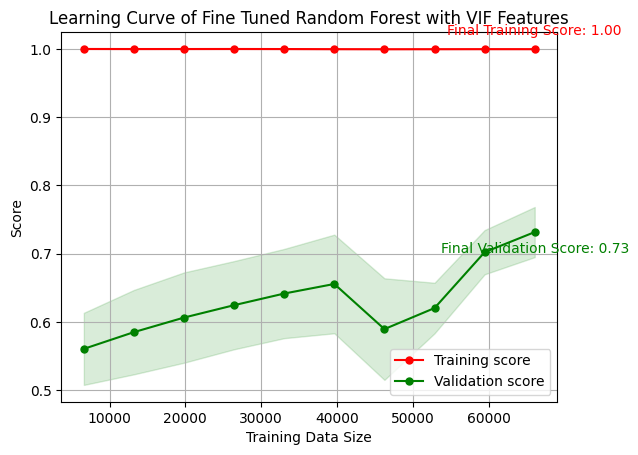

In [ ]:
# Define the parameter grid
rf_params = {
    'n_estimators': [2, 4 ,6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform the grid search
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = rf_grid_search.best_estimator_

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_best_rf.joblib')
joblib.dump(best_rf, model_path)

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)

print("\nFine Tuned Random Forest Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Print the best parameters found by Grid Search
print("Best Parameters:", rf_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_rf,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Random Forest with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## XGBoost


XG Boost Model
Accuracy: 0.7209668307642644
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      4928
           1       0.70      0.71      0.71      4917
           2       0.66      0.67      0.66      5076
           3       0.65      0.58      0.61      4980
           4       0.74      0.80      0.76      4881

    accuracy                           0.72     24782
   macro avg       0.72      0.72      0.72     24782
weighted avg       0.72      0.72      0.72     24782

Confusion Matrix :
 [[4195  730    3    0    0]
 [ 665 3513  721   14    4]
 [   8  724 3408  779  157]
 [   0   18  867 2868 1227]
 [   0   11  204  783 3883]]


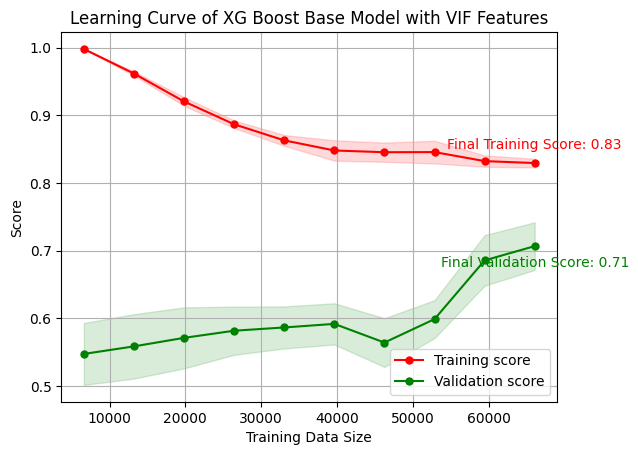

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_y_pred = xgb_classifier.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_base_xgb.joblib')
joblib.dump(xgb_classifier, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
report = classification_report(y_test, xgb_y_pred)
c_matrix= confusion_matrix(y_test, xgb_y_pred)

print("\nXG Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb_classifier,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of XG Boost Base Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned XG Boost

Fitting 3 folds for each of 243 candidates, totalling 729 fits

Fine Tuned XG Boost Model
Accuracy: 0.7093454926963119
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4928
           1       0.70      0.71      0.71      4917
           2       0.65      0.68      0.66      5076
           3       0.61      0.54      0.57      4980
           4       0.71      0.77      0.74      4881

    accuracy                           0.71     24782
   macro avg       0.71      0.71      0.71     24782
weighted avg       0.71      0.71      0.71     24782

Confusion Matrix:
 [[4191  736    1    0    0]
 [ 642 3505  753   13    4]
 [   6  704 3457  771  138]
 [   0   20  900 2685 1375]
 [   0   13  215  912 3741]]
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


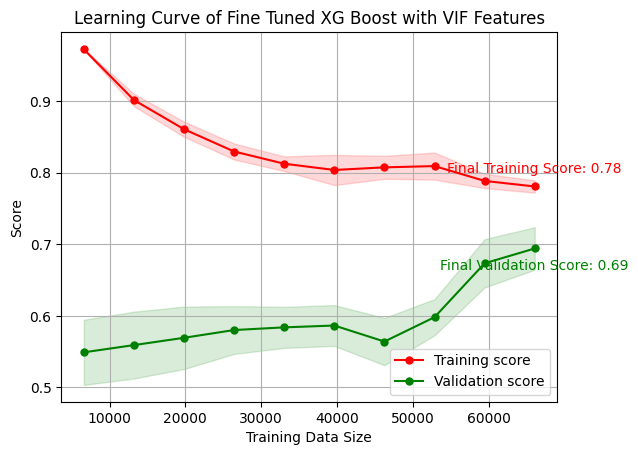

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize and train classifier
xgb_classifier = XGBClassifier()

xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_grid_search = GridSearchCV(xgb_classifier,xgb_params,scoring='accuracy',
                               n_jobs=-1,cv=3,verbose=1)

xgb_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_xgb = xgb_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'v_best_xgb.joblib')
joblib.dump(best_xgb, model_path)

# Evaluate the best Random Forest model
xgb_y_pred = best_xgb.predict(X_test)

print("\nFine Tuned XG Boost Model")
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print("Classification Report:\n", classification_report(y_test, xgb_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", xgb_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_xgb,
    X=X,
    y=y_encoded,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned XG Boost with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Ada Boost


Adaptive Boost Model
Accuracy: 0.48119602937616013
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.16      0.26      4928
           1       0.44      0.77      0.56      4917
           2       0.62      0.65      0.63      5076
           3       0.40      0.65      0.50      4980
           4       0.47      0.18      0.26      4881

    accuracy                           0.48     24782
   macro avg       0.53      0.48      0.44     24782
weighted avg       0.53      0.48      0.44     24782

Confusion Matrix :
 [[ 767 4161    0    0    0]
 [ 294 3777  807   33    6]
 [   8  598 3298  933  239]
 [   0   17 1008 3222  733]
 [   1    9  236 3774  861]]


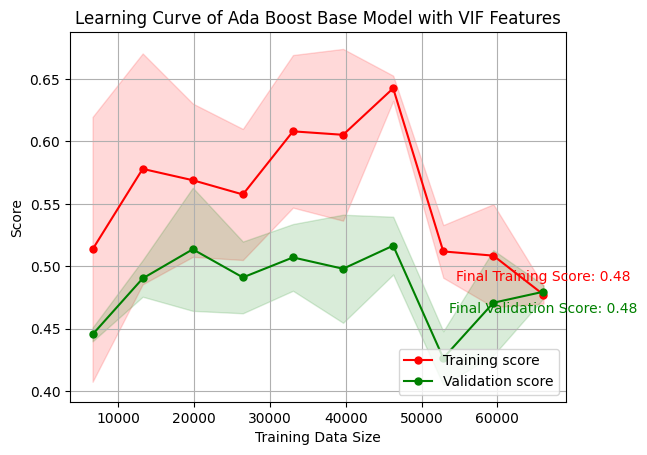

In [69]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost  = AdaBoostClassifier()

# Train the classifier
ada_boost.fit(X_train, y_train)
ada_boost_y_pred = ada_boost.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_base_ada.joblib')
joblib.dump(ada_boost, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, ada_boost_y_pred)
report = classification_report(y_test, ada_boost_y_pred)
c_matrix= confusion_matrix(y_test, ada_boost_y_pred)

print("\nAdaptive Boost Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=ada_boost,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')
# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Ada Boost Base Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Ada Boost

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Fine Tuned Ada Boost Model
Accuracy: 0.6824711484141716
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      4928
           1       0.73      0.70      0.71      4917
           2       0.61      0.77      0.68      5076
           3       0.53      0.39      0.45      4980
           4       0.65      0.73      0.69      4881

    accuracy                           0.68     24782
   macro avg       0.68      0.68      0.68     24782
weighted avg       0.68      0.68      0.68     24782

Confusion Matrix:
 [[4051  866   11    0    0]
 [ 465 3433 1003   10    6]
 [   2  399 3912  622  141]
 [   0   14 1230 1962 1774]
 [   0   10  240 1076 3555]]
Best Parameters: {'base_estimator__max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 50}


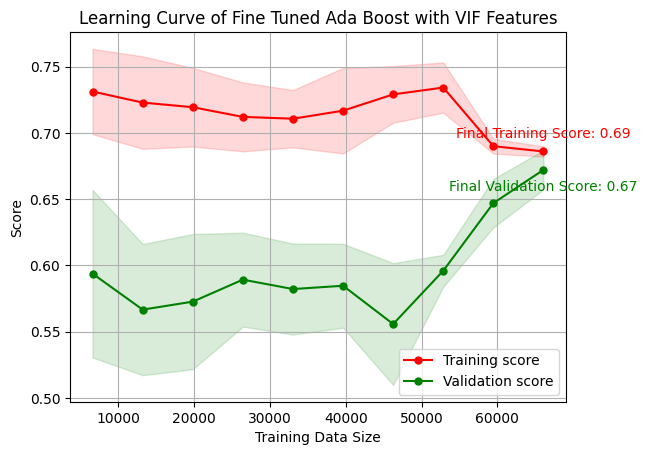

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# Create the parameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

ada_boost  = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Configure GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_ada = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'v_best_ada.joblib')
joblib.dump(best_ada, model_path)

# Make predictions with the best model
y_pred = best_ada.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Ada Boost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_ada,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Ada Boost with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Logistic Regression Model
Accuracy: 0.48817690259058993
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      4928
           1       0.44      0.43      0.44      4917
           2       0.41      0.35      0.37      5076
           3       0.39      0.31      0.34      4980
           4       0.45      0.58      0.51      4881

    accuracy                           0.49     24782
   macro avg       0.48      0.49      0.48     24782
weighted avg       0.48      0.49      0.48     24782

Confusion Matrix :
 [[3866  948  112    0    2]
 [1463 2132 1153   92   77]
 [ 131 1280 1762  896 1007]
 [   6  322  811 1528 2313]
 [   3  138  509 1421 2810]]


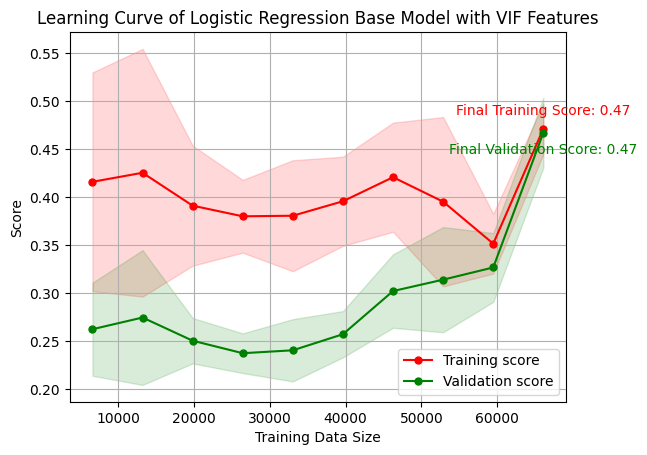

In [71]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_base_lr.joblib')
joblib.dump(log_reg, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lr_y_pred)
report = classification_report(y_test, lr_y_pred)
c_matrix= confusion_matrix(y_test, lr_y_pred)

print("\n Logistic Regression Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=log_reg,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Logistic Regression Base Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## Fine Tuned Logistic Regression

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(



Fine Tuned Logistic Regression Model
Accuracy: 0.6656444193366153
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      4928
           1       0.69      0.71      0.70      4917
           2       0.62      0.66      0.64      5076
           3       0.50      0.43      0.46      4980
           4       0.63      0.70      0.67      4881

    accuracy                           0.67     24782
   macro avg       0.67      0.67      0.66     24782
weighted avg       0.66      0.67      0.66     24782

Confusion Matrix:
 [[4052  876    0    0    0]
 [ 545 3511  828   26    7]
 [   1  656 3364  867  188]
 [   0   22 1007 2130 1821]
 [   0   24  219 1199 3439]]
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


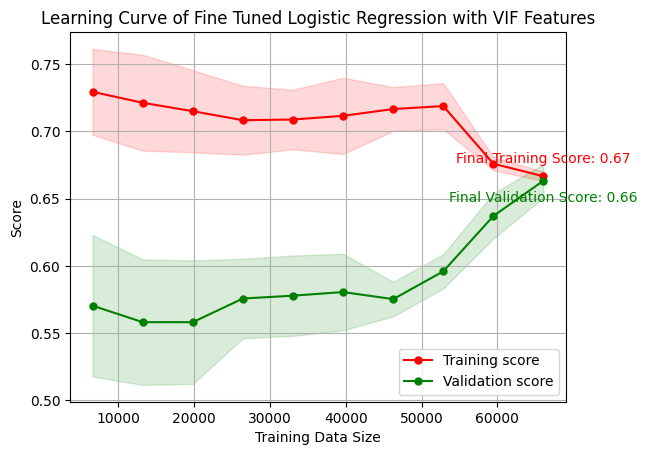

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

log_reg = LogisticRegression()

# Create the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strengths
    'penalty': ['l2','none'],   # Type of norm used in the penalization
    'solver': ['newton-cg', 'lbfgs', 'sag'],
}

# Configure GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid,
                           cv=5, scoring='accuracy',
                           verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_lr = grid_search.best_estimator_
# Save the best model
drive_path = '/content/drive/My Drive/Models'

# Save the model to the specified directory in Google Drive
model_path = os.path.join(drive_path, 'v_best_lr.joblib')
joblib.dump(best_lr, model_path)

# Make predictions with the best model
y_pred = best_lr.predict(X_test)

# Evaluate the best model
print("\nFine Tuned Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print the best parameters found by Grid Search
print("Best Parameters:", grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lr,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot-
plt.title('Learning Curve of Fine Tuned Logistic Regression with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

## LSVM

In [73]:
# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(



Linear SVM Model
Accuracy: 0.6010814300702122
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.95      0.84      4928
           1       0.64      0.61      0.62      4917
           2       0.69      0.26      0.38      5076
           3       0.40      0.34      0.37      4980
           4       0.55      0.86      0.67      4881

    accuracy                           0.60     24782
   macro avg       0.60      0.60      0.58     24782
weighted avg       0.61      0.60      0.57     24782

Confusion Matrix :
 [[4689  239    0    0    0]
 [1564 2978  261  100   14]
 [  13 1329 1341 1844  549]
 [   0   56  295 1689 2940]
 [   0   32   48  602 4199]]


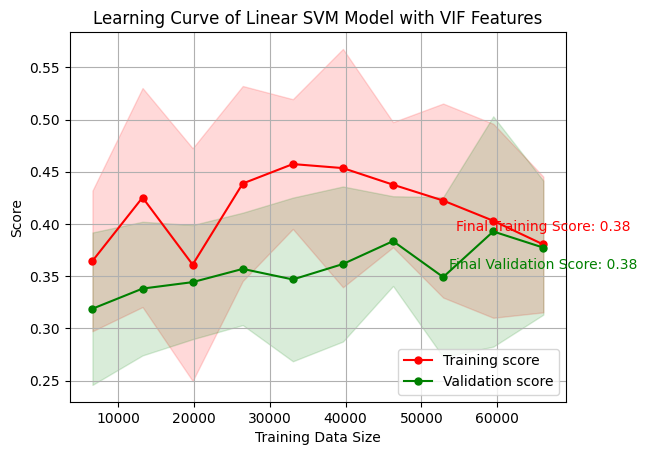

In [74]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a LinearSVC object
lsvc = LinearSVC()

# Train the model
lsvc.fit(X_train, y_train)

# Predict the labels of the test set
lsvc_y_pred = lsvc.predict(X_test)

# Save the model to the specified directory in Google Drive
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_base_lsvm.joblib')
joblib.dump(lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nLinear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Linear SVM Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


## Fine Tuned LSVM

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 326, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/pyt


Fine Tuned Linear SVM Model
Accuracy: 0.6010814300702122
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.95      0.84      4928
           1       0.64      0.61      0.62      4917
           2       0.69      0.26      0.38      5076
           3       0.40      0.34      0.37      4980
           4       0.55      0.86      0.67      4881

    accuracy                           0.60     24782
   macro avg       0.60      0.60      0.58     24782
weighted avg       0.61      0.60      0.57     24782

Confusion Matrix :
 [[4689  239    0    0    0]
 [1564 2978  261  100   14]
 [  13 1329 1341 1844  549]
 [   0   56  295 1689 2940]
 [   0   32   48  602 4199]]
Best Parameters: {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}


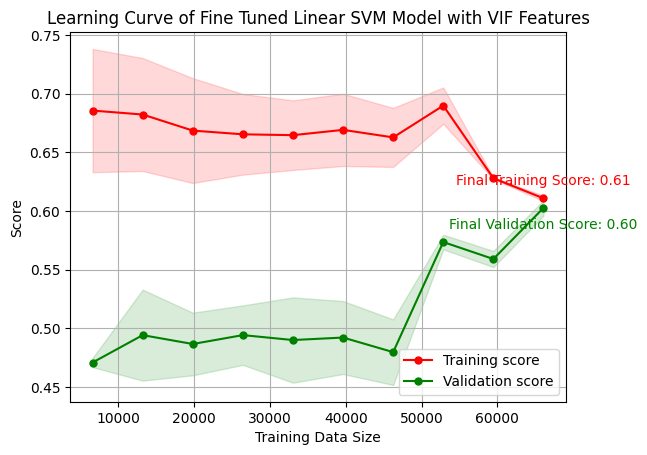

In [75]:
lsvm_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],        # Specifies the norm used in penalization
    'loss': ['hinge', 'squared_hinge'],  # Specifies the loss function
    'dual': [True, False]           # Dual or primal formulation
}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Configure GridSearchCV
lsvm_grid_search = GridSearchCV(lsvc, lsvm_params,
                                cv=5, scoring='accuracy',
                                verbose=1, n_jobs=-1)
lsvm_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_lsvc = lsvm_grid_search.best_estimator_

# Save the best model
drive_path = '/content/drive/My Drive/Models'
model_path = os.path.join(drive_path, 'v_best_lsvm.joblib')
joblib.dump(best_lsvc, model_path)

# Evaluate the model
accuracy = accuracy_score(y_test, lsvc_y_pred)
report = classification_report(y_test, lsvc_y_pred)
c_matrix= confusion_matrix(y_test, lsvc_y_pred)

print("\nFine Tuned Linear SVM Model")
print("Accuracy:", accuracy)
print("Classification Report :\n", report)
print("Confusion Matrix :\n", c_matrix)

# Print the best parameters found by Grid Search
print("Best Parameters:", lsvm_grid_search.best_params_)

# Generate the learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=best_lsvc,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # Proportion of training data used to generate the points
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1  # Use all computer cores
)

# Calculate the mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Create lines for the training and validation scores
plt.plot(train_sizes, train_mean, color='red', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='red')

plt.plot(train_sizes, validation_mean, color='green', marker='o', markersize=5, label='Validation score')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.15, color='green')

# Annotate final scores
final_train_score = f"{train_mean[-1]:.2f}"
final_validation_score = f"{validation_mean[-1]:.2f}"
plt.annotate(f"Final Training Score: {final_train_score}", (train_sizes[-1], train_mean[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.annotate(f"Final Validation Score: {final_validation_score}", (train_sizes[-1], validation_mean[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color='green')

# Create the plot
plt.title('Learning Curve of Fine Tuned Linear SVM Model with VIF Features')
plt.xlabel('Training Data Size')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()